# 

# ORIE 4580/5580/5581 Assignment 5

#### Students: Anurag Yadav (ay468)

### Github link: [example Github link](https://github.com/anurag3451/ORIE-5580-Homework)


### Instructions


* Due Thursday, November 6, at 11.59pm on Gradescope.
* Assignment .ipynb files available for download on [Canvas](https://canvas.cornell.edu/courses/80773#:~:text=Assignments-,Assignments,-Assignments%20module%20publish). Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Do all your work in provided notebook (text answers typeset in markdown; show all required code and generate plots inline), and then generate and submit a pdf.
* Ideally do assignments in groups of 2, and submit a single pdf with both names
* Please show your work and clearly mark your answers.
* You can use any code fragments given in class, found online (for example, on StackOverflow), or generated via Gemini/Claude/ChatGPT (you are encouraged to use these for first drafts) **with proper referencing**.
* You can also discuss with others (again, please reference them if you do so); but you must write your final answers on your own as a team.



### Suggested reading

Chapters 8 (all parts) and 9 (up to Section 9.2 for the midterm) of [Simulation by Ross](https://catalog.library.cornell.edu/catalog/12745977).


<hr><hr>

# Question 1: Red-Tailed Hawks! (15 points)

(Dedicated to [Big Red and Arthur](https://www.youtube.com/watch?v=diIn5tc8AJo), and their amazing family!)

A School of Ornithology researcher wants to estimate the number of red-tailed hawks in Ithaca. She radio tags 10 birds, and then sets up a feeding station with automatic camera.

The researcher believes that each individual bird's visits to the feeder can be modeled as a *Poisson process* with some unknown rate $\lambda$; we will talk more about the Poisson process in detail later in the semester (for a quick refresher, see Section 2.9.4 of Ross), but for this question, the main thing you need to know is that this is a process that counts a discrete number of arrivals, where the *inter-arrival* between one arrival and the next is independent and identically distributed as an Exponential$(\lambda)$ random variable (similar to the trains in question 5b in the previous assignment).

**(a)**
Over the first five weeks, the researcher observes an average of 28.8 birds (tagged and untagged) visiting the feeder, with an average of 6 tagged birds per week. Use the method of moments to obtain an estimate for the total population.

## Ans.
Each bird has probability $p$ of visiting the feeder in a given week, where

$$p = 1-e^{-\lambda}$$

If the total population is $N$, the expected number of birds (tagged + untagged) seen per week is $Np$, and the expected number of tagged birds seen per week is $10p$ (there are 10 tagged birds).

From the data:

$$10p \approx 6 \quad\Rightarrow\quad \hat{p} = \frac{6}{10}=0.6$$

Using the method of moments for the total:

$$\hat{N} = \frac{\text{mean total seen}}{\hat{p}}=\frac{28.8}{0.6}=\frac{288}{6}=48$$

So the method-of-moments estimate of the total red-tailed hawk population is $\boxed{48}$ birds.


<hr>

**(b)** Next, the researcher develops a video processing program which can identify and distinguish different individual birds from their pictures. Using this, over the next week, she observes 20 unique birds visiting the feeding station, out of which 4 are tagged. What is the MLE for the size of the hawk population in Ithaca?

<hr>

## Ans.
### MLE Estimate Using Capture-Recapture


In week 6, using video processing to identify individual birds:
- Total unique birds observed: 20
- Tagged birds among them: 4
- Total tagged birds in population: 10

Let $N$ = total population size.

#### Calculate the likelihood

Given that we observe 20 birds, and 4 of them are tagged:
- There are 10 tagged birds in the population
- There are $N - 10$ untagged birds in the population

The number of tagged birds in our sample of 20 follows a **hypergeometric distribution**:

$$P(\text{4 tagged in sample of 20} \mid N) = \frac{\binom{10}{4}\binom{N-10}{16}}{\binom{N}{20}}$$

#### Finding the MLE

The likelihood function is:

$$L(N) = \frac{\binom{10}{4}\binom{N-10}{16}}{\binom{N}{20}}$$

To maximize this, we use the intuitive capture-recapture principle:

$$\frac{\text{tagged in population}}{\text{total population}} \approx \frac{\text{tagged in sample}}{\text{sample size}}$$

$$\frac{10}{N} \approx \frac{4}{20}$$

Solving for $N$:

$$\hat{N}_{MLE} = \frac{10 \times 20}{4} = \frac{200}{4} = 50$$

### Answer

The MLE for the size of the hawk population is $\boxed{50}$ birds.

<hr><hr>

# Question 2: Soup for Lunch? (15 points)

The folks at the [Temple of Zeus](https://as.cornell.edu/about/temple-of-zeus) have the best soup offerings at Cornell -- however, by the time you are done with Simulation, they often run out of soup. To remedy this, you want to try and understand the demand for soup, so that you can suggest how much they should make. You decide to model the total demand $N$ for soups each day as a geometric random variable with parameter $p$ (i.e., $P(N = k) = (1-p)^kp$, $k \ge 0$).

The Temple of Zeus manager gives you data for the number of lunches sold in the last $100$ days. One problem though is that the data is *censored*: the staff prepared soup for at most $40$ servings each day, and as a result, the number of sales each day is between 0 and 40. As a result, on days when the number of soups sold is $40$, you cannot be sure what the true demand $N_i$ was (but you know $N_i\geq 40$); on other days, the number of soups sold is the true demand $N_i<40$.

<hr>

**(a)**
What is the probability mass function of the per-day sales $Y$ in terms of $p$?

<hr>

## Ans.
### Temple of Zeus Soup Demand Problem

#### Problem Setup

- Total demand $N$ for soup each day follows a Geometric$(p)$ distribution:
  $$P(N = k) = (1-p)^k p, \quad k \geq 0$$

- The Temple prepares at most 40 servings per day
- Sales data $Y$ is **censored** at 40:
  - If true demand $N < 40$: we observe $Y = N$ (exact demand)
  - If true demand $N \geq 40$: we observe $Y = 40$ (censored observation)

#### Part (a): PMF of Per-Day Sales $Y$

#### Solution

The observed sales $Y$ can take values in $\{0, 1, 2, \ldots, 40\}$.

#### Case 1: $Y = k$ for $k = 0, 1, 2, \ldots, 39$

When $Y = k < 40$, this means the true demand was exactly $k$ (no censoring):

$$P(Y = k) = P(N = k) = (1-p)^k p$$

#### Case 2: $Y = 40$

When $Y = 40$, this means the true demand was at least 40 (censored observation):

$$P(Y = 40) = P(N \geq 40) = \sum_{k=40}^{\infty} (1-p)^k p$$

Using the geometric series formula:

$$P(Y = 40) = p(1-p)^{40} \sum_{j=0}^{\infty} (1-p)^j = p(1-p)^{40} \cdot \frac{1}{1-(1-p)} = p(1-p)^{40} \cdot \frac{1}{p} = (1-p)^{40}$$

#### Answer

The probability mass function of $Y$ is:

$$P(Y = k) = \begin{cases}
(1-p)^k p & \text{if } k = 0, 1, 2, \ldots, 39 \\
(1-p)^{40} & \text{if } k = 40
\end{cases}$$



<hr>

**(b)** Compute a maximum likelihood estimator of $p$ based on the sales data for soup given in `Soup_sales_data.csv`.

<hr>

## Ans.


In [63]:
import pandas as pd

# === CSV data ===
# Replace 'sales_data.csv' with your actual filename if different
data = pd.read_csv('Soup_sales_data.csv')

print("Columns in dataset:", data.columns.tolist())
print(data.head(), "\n")

# === Step 2. Identify the data column ===
# Try to automatically detect the numeric column with values in 0–40 range
numeric_cols = data.select_dtypes(include='number').columns
if len(numeric_cols) == 0:
    raise ValueError("No numeric columns found in the CSV file. Please check the file.")

# Choose the first numeric column by default
col_name = numeric_cols[0]
y = data[col_name]

if not ((y >= 0) & (y <= 40)).any():
    print("data values are outside the 0–40 range expected for Y.")
    print("Please check that this file contains the correct variable for the geometric model.\n")

# === Step 3. Compute MLE for p ===
# Model:  P(Y=k) = (1-p)^k * p,  k=0,...,39;  P(Y=40) = (1-p)^40
n = len(y)
n1 = (y < 40).sum()                      # number of non-censored observations
sum_y = y.clip(upper=40).sum()           # sum of min(y_i, 40)
p_hat = n1 / (n1 + sum_y)                # MLE for p

# === Step 4. Print results ===
print(f"Number of observations (n): {n}")
print(f"Non-censored count (y < 40): {n1}")
print(f"Sum of min(y_i, 40): {sum_y}")
print(f"Maximum Likelihood Estimate of p: {p_hat:.6f}")

# === Step 5. Optional: Save result to file ===
out = pd.DataFrame({"n": [n], "n1": [n1], "sum_y": [sum_y], "p_hat": [p_hat]})
out.to_csv("mle_result.csv", index=False)



Columns in dataset: ['Day', 'Y']
   Day   Y
0    1  40
1    2   3
2    3  33
3    4  24
4    5  28 

Number of observations (n): 100
Non-censored count (y < 40): 39
Sum of min(y_i, 40): 3220
Maximum Likelihood Estimate of p: 0.011967


<hr><hr>

# Question 3: The Birthday Paradox (40 pts)

In this question, we investigate the celebrated [birthday paradox](https://en.wikipedia.org/wiki/Birthday_problem)!

<hr>

**(a)** The basic question you may have seen in earlier probability courses is the following: given a party of $n$ people whose birthdays are drawn uniformly over the $365$ days in the year, what is the probability that at least two people share a birthday. Derive an expression for the probability, and plot it for $n\in\{10,11,12,\ldots,49,50\}$.

<hr>

## Ans.

## Birthday Problem

## Problem Statement

Given a party of $n$ people whose birthdays are drawn uniformly over 365 days in the year, what is the probability that at least two people share a birthday?

## Theoretical Solution

### Approach: Use the Complement

It's easier to calculate the probability that **no two people share a birthday**, then subtract from 1.

Let $A$ = event that at least two people share a birthday

Then:
$$P(A) = 1 - P(A^c) = 1 - P(\text{all birthdays are different})$$

### Calculating $P(\text{all birthdays different})$

For $n$ people:
- First person: can have any of 365 days → probability = $\frac{365}{365}$
- Second person: must avoid 1 day → probability = $\frac{364}{365}$
- Third person: must avoid 2 days → probability = $\frac{363}{365}$
- ...
- $n$-th person: must avoid $(n-1)$ days → probability = $\frac{365-(n-1)}{365}$

Since birthdays are independent:

$$P(\text{all different}) = \frac{365}{365} \cdot \frac{364}{365} \cdot \frac{363}{365} \cdots \frac{365-n+1}{365}$$

$$P(\text{all different}) = \prod_{k=0}^{n-1} \frac{365-k}{365}$$

### Final Formula

$$\boxed{P(\text{at least one shared birthday}) = 1 - \prod_{k=0}^{n-1} \frac{365-k}{365}}$$

Or equivalently:

$$P(\text{shared birthday}) = 1 - \frac{365!}{(365-n)! \cdot 365^n}$$

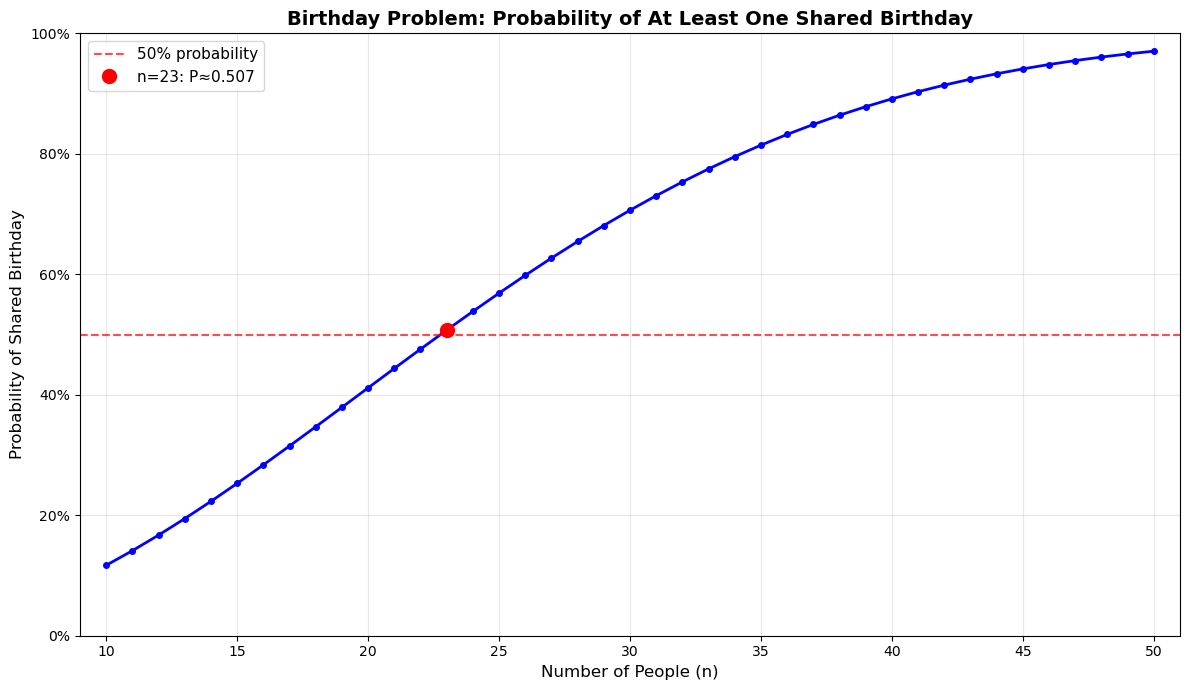

Birthday Problem Results
n (people)   P(shared birthday)        Percentage
10           0.116948                  11.69%
15           0.252901                  25.29%
20           0.411438                  41.14%
23           0.507297                  50.73%
25           0.568700                  56.87%
30           0.706316                  70.63%
35           0.814383                  81.44%
40           0.891232                  89.12%
45           0.940976                  94.10%
50           0.970374                  97.04%

Key insight: With just 23 people, there's a >50% chance!


In [24]:
import numpy as np
import matplotlib.pyplot as plt

def birthday_probability(n):
    """
    Calculate the probability that at least two people 
    in a group of n share a birthday.
    """
    if n > 365:
        return 1.0
    
    # Calculate probability that all birthdays are different
    prob_all_different = 1.0
    for k in range(n):
        prob_all_different *= (365 - k) / 365
    
    # Probability of at least one match
    prob_match = 1 - prob_all_different
    
    return prob_match

# Calculate probabilities for n = 10 to 50
n_values = range(10, 51)
probabilities = [birthday_probability(n) for n in n_values]

# Create the plot
plt.figure(figsize=(12, 7))
plt.plot(n_values, probabilities, 'b-', linewidth=2, marker='o', markersize=4)

# Add horizontal line at 50%
plt.axhline(y=0.5, color='red', linestyle='--', linewidth=1.5, 
            label='50% probability', alpha=0.7)

# Mark the point where probability exceeds 50%
n_50 = next(n for n in n_values if birthday_probability(n) > 0.5)
prob_50 = birthday_probability(n_50)
plt.plot(n_50, prob_50, 'ro', markersize=10, 
         label=f'n={n_50}: P≈{prob_50:.3f}')

# Formatting
plt.xlabel('Number of People (n)', fontsize=12)
plt.ylabel('Probability of Shared Birthday', fontsize=12)
plt.title('Birthday Problem: Probability of At Least One Shared Birthday', 
          fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)
plt.xlim(9, 51)
plt.ylim(0, 1)

# Add percentage on y-axis
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y*100:.0f}%'))

plt.tight_layout()
plt.show()

# Print table of results
print("Birthday Problem Results")
print("=" * 60)
print(f"{'n (people)':<12} {'P(shared birthday)':<25} {'Percentage'}")
print("=" * 60)

for n in [10, 15, 20, 23, 25, 30, 35, 40, 45, 50]:
    prob = birthday_probability(n)
    print(f"{n:<12} {prob:<25.6f} {prob*100:.2f}%")

print("=" * 60)
print(f"\nKey insight: With just {n_50} people, there's a >50% chance!")

<hr>

**(b)** Next, we want to obtain the above probabilities by simulation. For a given $n$, perform simulations so as to estimate the probability  of at least two people sharing birthdays in a group of $n$, for $n\in\{15,16,\ldots,30\}$, up to $2$ decimal places (with $95\%$ confidence). Plot the estimates and $95\%$ CI, and also plot the theoretical result from part $(a)$ in the same plot.

<hr>

## Ans.

## Birthday Problem - Part (b): Simulation

## Simulation Approach

We will estimate the probability by simulation:
1. For each value of $n$, generate many random "parties" of $n$ people
2. For each party, randomly assign birthdays (uniformly from 1 to 365)
3. Check if any two people share a birthday
4. Estimate probability as: $\hat{p} = \frac{\text{number of parties with shared birthdays}}{\text{total number of simulations}}$

## Confidence Interval

For a proportion $\hat{p}$ based on $m$ simulations, the 95% confidence interval is:

$$\hat{p} \pm 1.96 \sqrt{\frac{\hat{p}(1-\hat{p})}{m}}$$

To achieve accuracy up to 2 decimal places (margin of error $\leq 0.005$), we need:

$$1.96 \sqrt{\frac{\hat{p}(1-\hat{p})}{m}} \leq 0.005$$

In the worst case where $\hat{p} = 0.5$:

$$m \geq \frac{1.96^2 \times 0.5 \times 0.5}{0.005^2} = 38,416$$

We'll use $m = 50,000$ simulations to be safe.

n=15: Simulated=0.2515, CI=[0.2477, 0.2553], Theoretical=0.2529
n=16: Simulated=0.2841, CI=[0.2801, 0.2880], Theoretical=0.2836
n=17: Simulated=0.3114, CI=[0.3074, 0.3155], Theoretical=0.3150
n=18: Simulated=0.3464, CI=[0.3422, 0.3506], Theoretical=0.3469
n=19: Simulated=0.3818, CI=[0.3776, 0.3861], Theoretical=0.3791
n=20: Simulated=0.4076, CI=[0.4033, 0.4119], Theoretical=0.4114
n=21: Simulated=0.4429, CI=[0.4385, 0.4473], Theoretical=0.4437
n=22: Simulated=0.4768, CI=[0.4725, 0.4812], Theoretical=0.4757
n=23: Simulated=0.5048, CI=[0.5004, 0.5092], Theoretical=0.5073
n=24: Simulated=0.5339, CI=[0.5295, 0.5383], Theoretical=0.5383
n=25: Simulated=0.5686, CI=[0.5642, 0.5729], Theoretical=0.5687
n=26: Simulated=0.5980, CI=[0.5937, 0.6023], Theoretical=0.5982
n=27: Simulated=0.6282, CI=[0.6240, 0.6325], Theoretical=0.6269
n=28: Simulated=0.6578, CI=[0.6537, 0.6620], Theoretical=0.6545
n=29: Simulated=0.6777, CI=[0.6736, 0.6818], Theoretical=0.6810
n=30: Simulated=0.7054, CI=[0.7014, 0.70

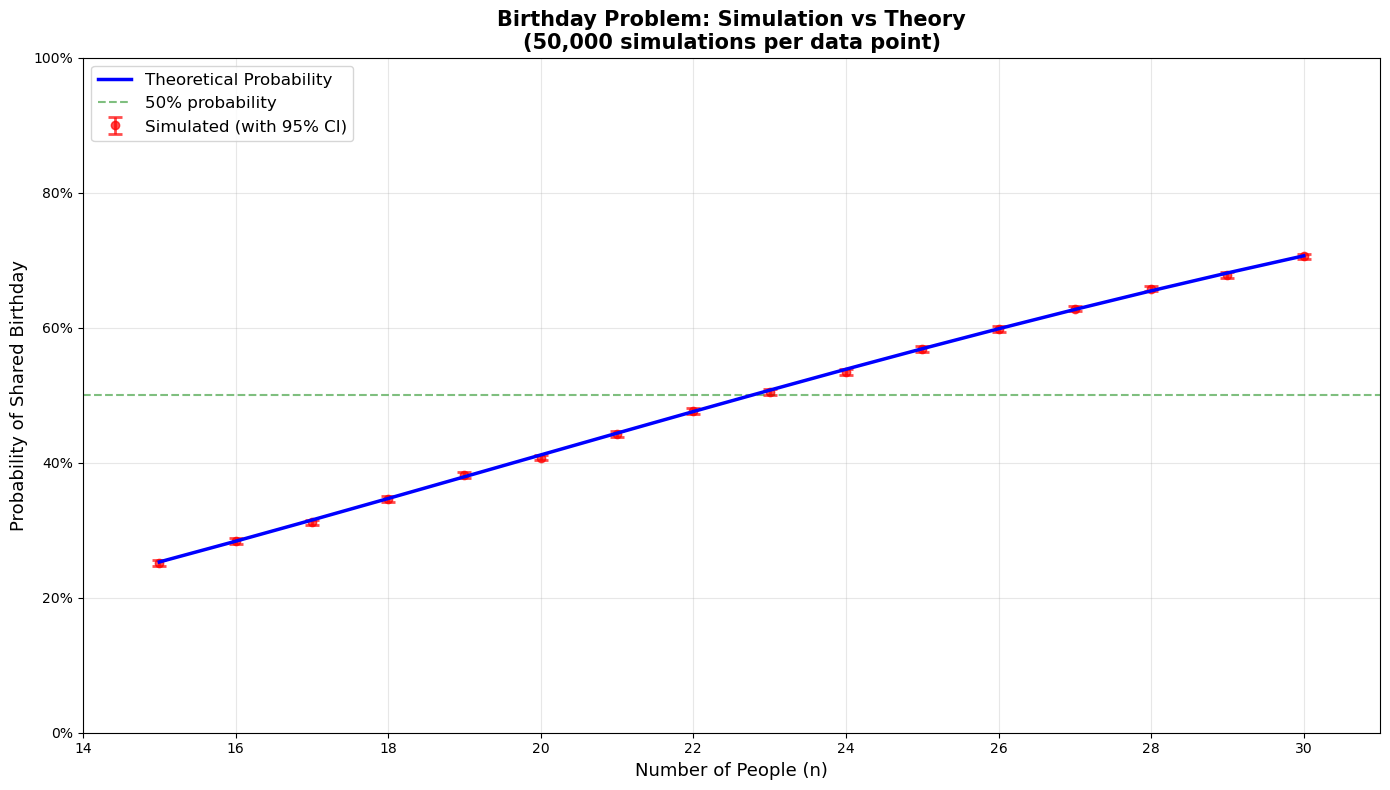


Detailed Results: Simulation vs Theory
n     Simulated    95% CI Lower   95% CI Upper   Theoretical  Difference
15    0.2515       0.2477         0.2553         0.2529       0.0014
16    0.2841       0.2801         0.2880         0.2836       0.0005
17    0.3114       0.3074         0.3155         0.3150       0.0036
18    0.3464       0.3422         0.3506         0.3469       0.0005
19    0.3818       0.3776         0.3861         0.3791       0.0027
20    0.4076       0.4033         0.4119         0.4114       0.0038
21    0.4429       0.4385         0.4473         0.4437       0.0008
22    0.4768       0.4725         0.4812         0.4757       0.0011
23    0.5048       0.5004         0.5092         0.5073       0.0025
24    0.5339       0.5295         0.5383         0.5383       0.0044
25    0.5686       0.5642         0.5729         0.5687       0.0001
26    0.5980       0.5937         0.6023         0.5982       0.0002
27    0.6282       0.6240         0.6325         0.6269    

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def birthday_probability_theory(n):
    """Calculate theoretical probability"""
    if n > 365:
        return 1.0
    prob_all_different = 1.0
    for k in range(n):
        prob_all_different *= (365 - k) / 365
    return 1 - prob_all_different

def simulate_birthday_problem(n, num_simulations=50000):
    """
    Simulate the birthday problem for n people.
    
    Parameters:
    n: number of people in each party
    num_simulations: number of parties to simulate
    
    Returns:
    estimated probability and 95% CI
    """
    shared_birthday_count = 0
    
    for _ in range(num_simulations):
        # Generate random birthdays for n people (1 to 365)
        birthdays = np.random.randint(1, 366, size=n)
        
        # Check if any two people share a birthday
        # If all unique, len(unique) == n; otherwise there's a duplicate
        if len(np.unique(birthdays)) < n:
            shared_birthday_count += 1
    
    # Estimate probability
    p_hat = shared_birthday_count / num_simulations
    
    # Calculate 95% confidence interval
    margin_of_error = 1.96 * np.sqrt(p_hat * (1 - p_hat) / num_simulations)
    ci_lower = p_hat - margin_of_error
    ci_upper = p_hat + margin_of_error
    
    return p_hat, ci_lower, ci_upper

# Run simulations for n = 15 to 30
np.random.seed(42)  # For reproducibility
n_values = range(15, 31)
num_sims = 50000

results = []
for n in n_values:
    p_hat, ci_lower, ci_upper = simulate_birthday_problem(n, num_sims)
    p_theory = birthday_probability_theory(n)
    results.append({
        'n': n,
        'p_simulated': p_hat,
        'ci_lower': ci_lower,
        'ci_upper': ci_upper,
        'p_theoretical': p_theory
    })
    print(f"n={n:2d}: Simulated={p_hat:.4f}, CI=[{ci_lower:.4f}, {ci_upper:.4f}], Theoretical={p_theory:.4f}")

# Extract data for plotting
n_vals = [r['n'] for r in results]
p_sim = [r['p_simulated'] for r in results]
ci_lower = [r['ci_lower'] for r in results]
ci_upper = [r['ci_upper'] for r in results]
p_theory = [r['p_theoretical'] for r in results]

# Create the plot
plt.figure(figsize=(14, 8))

# Plot theoretical curve
plt.plot(n_vals, p_theory, 'b-', linewidth=2.5, label='Theoretical Probability', zorder=3)

# Plot simulated estimates with error bars
plt.errorbar(n_vals, p_sim, 
             yerr=[np.array(p_sim) - np.array(ci_lower), 
                   np.array(ci_upper) - np.array(p_sim)],
             fmt='ro', markersize=6, capsize=5, capthick=2, 
             elinewidth=2, alpha=0.7, label='Simulated (with 95% CI)', zorder=2)

# Add 50% reference line
plt.axhline(y=0.5, color='green', linestyle='--', linewidth=1.5, 
            alpha=0.5, label='50% probability')

# Formatting
plt.xlabel('Number of People (n)', fontsize=13)
plt.ylabel('Probability of Shared Birthday', fontsize=13)
plt.title(f'Birthday Problem: Simulation vs Theory\n({num_sims:,} simulations per data point)', 
          fontsize=15, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12, loc='upper left')
plt.xlim(14, 31)
plt.ylim(0, 1)

# Format y-axis as percentages
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y*100:.0f}%'))

plt.tight_layout()
plt.show()

# Print detailed results table
print("\n" + "="*90)
print("Detailed Results: Simulation vs Theory")
print("="*90)
print(f"{'n':<5} {'Simulated':<12} {'95% CI Lower':<14} {'95% CI Upper':<14} {'Theoretical':<12} {'Difference'}")
print("="*90)

for r in results:
    diff = abs(r['p_simulated'] - r['p_theoretical'])
    print(f"{r['n']:<5} {r['p_simulated']:<12.4f} {r['ci_lower']:<14.4f} "
          f"{r['ci_upper']:<14.4f} {r['p_theoretical']:<12.4f} {diff:.4f}")

print("="*90)

# Check if all theoretical values fall within CIs
all_within_ci = all(r['ci_lower'] <= r['p_theoretical'] <= r['ci_upper'] for r in results)
print(f"\nAll theoretical values within 95% CI: {all_within_ci}")
print(f"Number of simulations per n: {num_sims:,}")

<hr>

**(c)** One flaw in our analysis is that birth-dates may not be uniformly distributed throughout the year. To check this, we can look at data of real birth-dates.

The file `bdaydata.txt` has a list of $365$ days in the year (excluding February $29$) and the corresponding number of birthdays on that date. Load the dataset and plot the following:

i. Empirical histogram of the data

ii. Empirical cdf

iii. Q-Q plot comparing the data to a uniform distribution

(Dataset based on life insurance data from 1981-94; data and example courtesy [Roy Murphy](http://www.panix.com/~murphy/bday.html).)

<hr>

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# First, let's see what's in the file
print("Checking file content...")
print("="*70)
try:
    with open('bdaydata.txt', 'r') as f:
        first_lines = [f.readline() for _ in range(5)]
    print("First 5 lines of the file:")
    for i, line in enumerate(first_lines, 1):
        print(f"Line {i}: {repr(line)}")
except FileNotFoundError:
    print("ERROR: File 'bdaydata.txt' not found!")
    print("Please make sure the file is in the same directory as your notebook.")
    print("\nCurrent directory contents:")
    import os
    print(os.listdir('.'))

print("="*70)

# Now try to load the data with multiple methods
counts = None


# Method 2: Skip header if exists
if counts is None:
    try:
        data = np.loadtxt('bdaydata.txt', skiprows=1)
        if data.ndim == 2:
            counts = data[:, -1]
        else:
            counts = data
        print("✓ Loaded successfully with skiprows=1")
    except Exception as e:
        print(f"Method 2 failed: {e}")

# Method 3: Read line by line
if counts is None:
    try:
        counts = []
        with open('bdaydata.txt', 'r') as f:
            for line in f:
                line = line.strip()
                if line and not line.startswith('#'):  # Skip empty and comment lines
                    parts = line.split()
                    # Try to get the last number in the line
                    for part in reversed(parts):
                        try:
                            counts.append(float(part))
                            break
                        except ValueError:
                            continue
        counts = np.array(counts)
        print("✓ Loaded successfully line by line")
    except Exception as e:
        print(f"Method 3 failed: {e}")

# Method 4: Try comma-separated
if counts is None or len(counts) == 0:
    try:
        data = np.loadtxt('bdaydata.txt', delimiter=',')
        if data.ndim == 2:
            counts = data[:, -1]
        else:
            counts = data
        print("✓ Loaded successfully with comma delimiter")
    except Exception as e:
        print(f"Method 4 failed: {e}")

# Check if we successfully loaded data
if counts is None or len(counts) == 0:
    print("\n" + "="*70)
    print("FAILED TO LOAD DATA")
    print("="*70)
    print("Please check:")
    print("1. File name is exactly 'bdaydata.txt'")
    print("2. File is in the same directory as this notebook")
    print("3. File is not empty")
    print("4. File format is readable")
else:
    print("\n" + "="*70)
    print("DATA LOADED SUCCESSFULLY")
    print("="*70)
    print(f"Number of days: {len(counts)}")
    print(f"Total births: {np.sum(counts):.0f}")
    print(f"Mean births per day: {np.mean(counts):.2f}")
    print(f"Std deviation: {np.std(counts):.2f}")
    print(f"Min: {np.min(counts):.0f}, Max: {np.max(counts):.0f}")
    print(f"\nFirst 10 values: {counts[:10]}")
    print(f"Last 10 values: {counts[-10:]}")

Checking file content...
First 5 lines of the file:
Line 1: 'date count\n'
Line 2: '0101 1482\n'
Line 3: '0102 1213\n'
Line 4: '0103 1220\n'
Line 5: '0104 1319\n'
✓ Loaded successfully with skiprows=1

DATA LOADED SUCCESSFULLY
Number of days: 365
Total births: 480715
Mean births per day: 1317.03
Std deviation: 69.86
Min: 1126, Max: 1559

First 10 values: [1482. 1213. 1220. 1319. 1262. 1271. 1355. 1219. 1253. 1339.]
Last 10 values: [1333. 1179. 1193. 1216. 1126. 1256. 1426. 1332. 1355. 1352.]


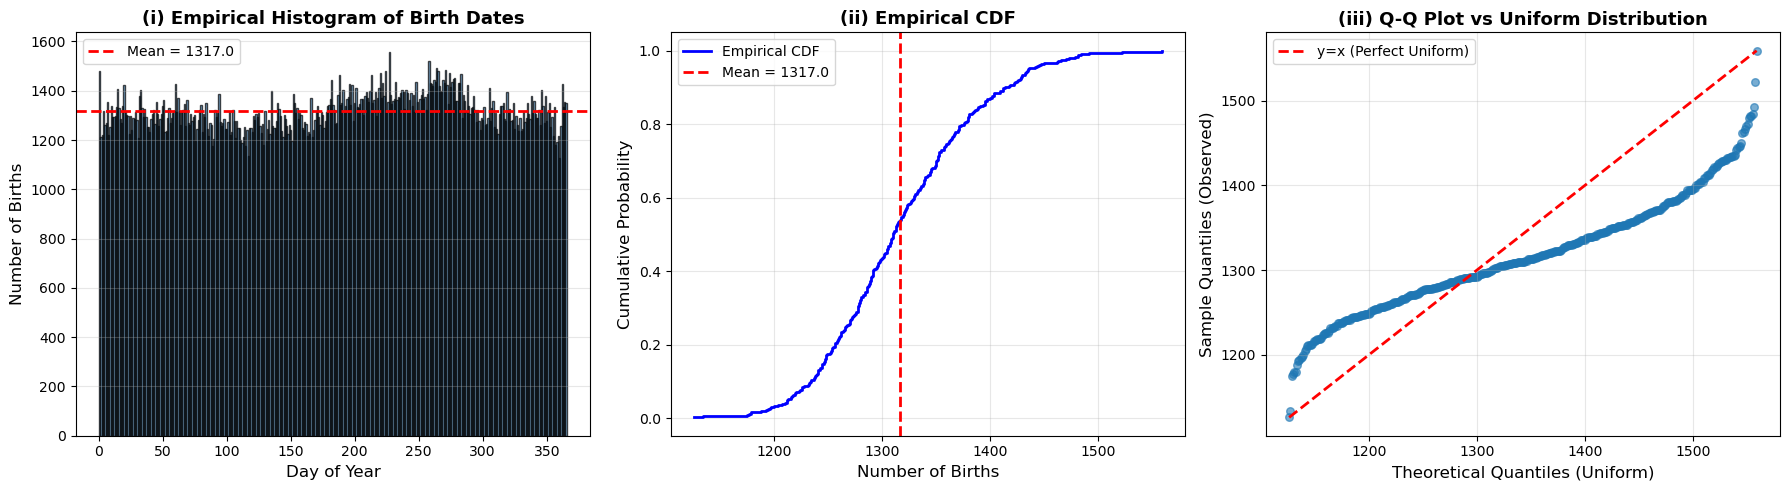

In [34]:
# Create days array
days = np.arange(1, len(counts) + 1)

# Create figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Histogram
axes[0].bar(days, counts, width=1.0, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].axhline(y=np.mean(counts), color='red', linestyle='--', linewidth=2, 
                label=f'Mean = {np.mean(counts):.1f}')
axes[0].set_xlabel('Day of Year', fontsize=12)
axes[0].set_ylabel('Number of Births', fontsize=12)
axes[0].set_title('(i) Empirical Histogram of Birth Dates', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

# Plot 2: Empirical CDF
sorted_counts = np.sort(counts)
n = len(sorted_counts)
empirical_cdf = np.arange(1, n + 1) / n

axes[1].step(sorted_counts, empirical_cdf, 'b-', linewidth=2, where='post', label='Empirical CDF')
axes[1].axvline(x=np.mean(counts), color='red', linestyle='--', linewidth=2, 
                label=f'Mean = {np.mean(counts):.1f}')
axes[1].set_xlabel('Number of Births', fontsize=12)
axes[1].set_ylabel('Cumulative Probability', fontsize=12)
axes[1].set_title('(ii) Empirical CDF', fontsize=13, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Plot 3: Q-Q Plot
sorted_data = np.sort(counts)
n = len(sorted_data)
theoretical_quantiles = np.linspace(np.min(counts), np.max(counts), n)

axes[2].scatter(theoretical_quantiles, sorted_data, alpha=0.6, s=30)
axes[2].plot([np.min(counts), np.max(counts)], [np.min(counts), np.max(counts)], 
             'r--', linewidth=2, label='y=x (Perfect Uniform)')
axes[2].set_xlabel('Theoretical Quantiles (Uniform)', fontsize=12)
axes[2].set_ylabel('Sample Quantiles (Observed)', fontsize=12)
axes[2].set_title('(iii) Q-Q Plot vs Uniform Distribution', fontsize=13, fontweight='bold')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [35]:
# Statistical tests
print("="*70)
print("Statistical Analysis")
print("="*70)

# Chi-square test for uniformity
expected = np.mean(counts)
chi_stat = np.sum((counts - expected)**2 / expected)
df = len(counts) - 1
p_value_chi = 1 - stats.chi2.cdf(chi_stat, df)

print(f"\nChi-Square Goodness-of-Fit Test:")
print(f"  Chi-square statistic: {chi_stat:.2f}")
print(f"  Degrees of freedom: {df}")
print(f"  P-value: {p_value_chi:.6f}")
print(f"  Result: {'NOT uniform' if p_value_chi < 0.05 else 'Consistent with uniform'}")

# KS test
ks_stat, ks_pvalue = stats.kstest(counts, 'uniform', 
                                   args=(np.min(counts), np.max(counts) - np.min(counts)))
print(f"\nKolmogorov-Smirnov Test:")
print(f"  KS statistic: {ks_stat:.4f}")
print(f"  P-value: {ks_pvalue:.6f}")
print(f"  Result: {'NOT uniform' if ks_pvalue < 0.05 else 'Consistent with uniform'}")

# Find outliers
z_scores = (counts - np.mean(counts)) / np.std(counts)
outlier_indices = np.where(np.abs(z_scores) > 2)[0]

print(f"\nOutlier Days (|z-score| > 2): {len(outlier_indices)} days")
if len(outlier_indices) > 0 and len(outlier_indices) <= 10:
    for idx in outlier_indices:
        print(f"  Day {idx+1}: {counts[idx]:.0f} births (z = {z_scores[idx]:.2f})")

# Top and bottom days
top_5 = np.argsort(counts)[-5:][::-1]
bottom_5 = np.argsort(counts)[:5]

print(f"\nTop 5 Days:")
for idx in top_5:
    print(f"  Day {idx+1}: {counts[idx]:.0f} births")

print(f"\nBottom 5 Days:")
for idx in bottom_5:
    print(f"  Day {idx+1}: {counts[idx]:.0f} births")

print("="*70)

Statistical Analysis

Chi-Square Goodness-of-Fit Test:
  Chi-square statistic: 1352.72
  Degrees of freedom: 364
  P-value: 0.000000
  Result: NOT uniform

Kolmogorov-Smirnov Test:
  KS statistic: 0.2429
  P-value: 0.000000
  Result: NOT uniform

Outlier Days (|z-score| > 2): 16 days

Top 5 Days:
  Day 227: 1559 births
  Day 258: 1522 births
  Day 264: 1492 births
  Day 271: 1484 births
  Day 1: 1482 births

Bottom 5 Days:
  Day 360: 1126 births
  Day 117: 1134 births
  Day 89: 1175 births
  Day 115: 1177 births
  Day 129: 1179 births


<hr>

**(d)** Perform a Chi-square Test **and** a Kolmogorov-Smirnov Test to study how well the data is modeled by a uniform distribution.

<hr>

## Ans.


CHI-SQUARE GOODNESS-OF-FIT TEST FOR UNIFORMITY

Data Summary:
  Number of days: 365
  Total births: 480715
  Mean births per day: 1317.03
  Standard deviation: 69.86

--------------------------------------------------------------------------------
HYPOTHESIS TEST
--------------------------------------------------------------------------------
H₀: Birthdays are uniformly distributed across all days
H₁: Birthdays are NOT uniformly distributed
Significance level: α = 0.05

--------------------------------------------------------------------------------
TEST RESULTS
--------------------------------------------------------------------------------
Expected frequency (under H₀): 1317.03 births per day

Chi-square statistic: χ² = 1352.7234
Degrees of freedom: df = 364
Critical value (α=0.05): 409.4882
P-value: 0.000000e+00

--------------------------------------------------------------------------------
DECISION
--------------------------------------------------------------------------------
✗

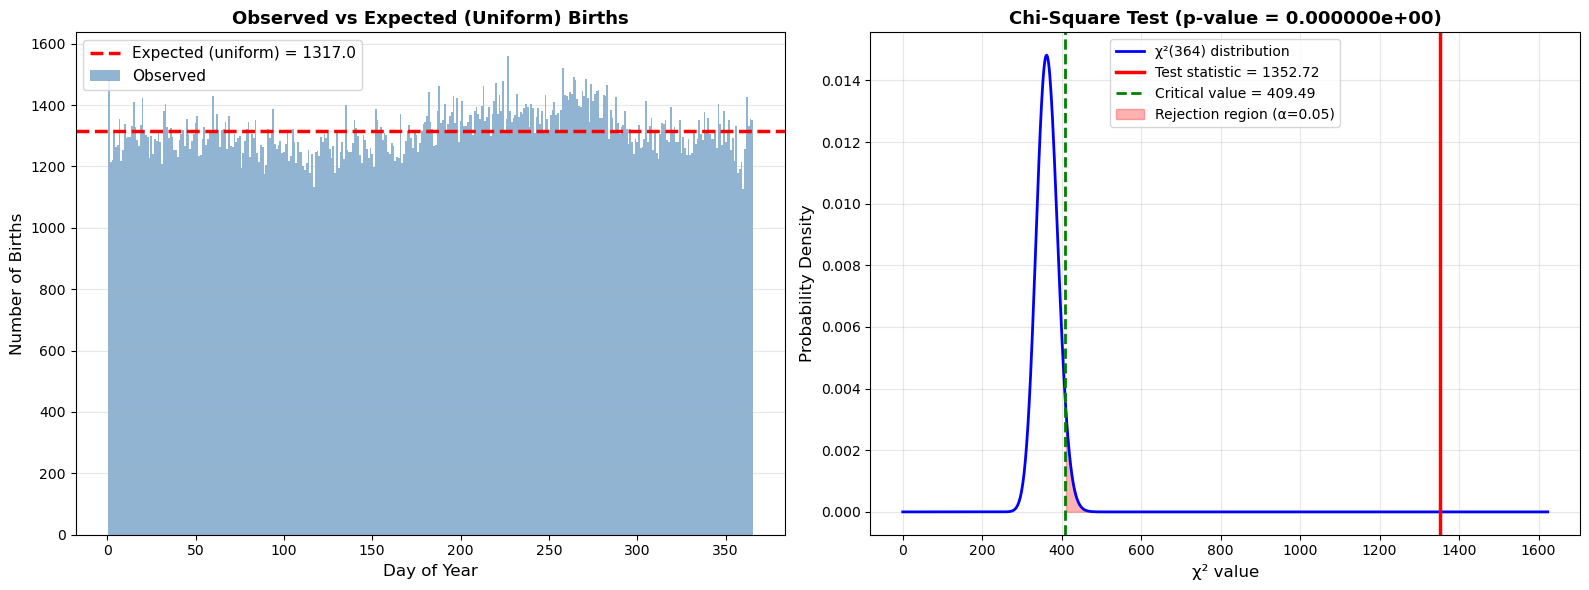

In [36]:
## Chi-square test
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Load the data
try:
    data = np.loadtxt('bdaydata.txt')
    if data.ndim == 2:
        counts = data[:, -1]
    else:
        counts = data
except:
    counts = []
    with open('bdaydata.txt', 'r') as f:
        for line in f:
            line = line.strip()
            if line:
                parts = line.split()
                try:
                    counts.append(float(parts[-1]))
                except:
                    pass
    counts = np.array(counts)

print("="*80)
print("CHI-SQUARE GOODNESS-OF-FIT TEST FOR UNIFORMITY")
print("="*80)

# Data summary
n_days = len(counts)
total_births = np.sum(counts)
mean_births = np.mean(counts)

print(f"\nData Summary:")
print(f"  Number of days: {n_days}")
print(f"  Total births: {total_births:.0f}")
print(f"  Mean births per day: {mean_births:.2f}")
print(f"  Standard deviation: {np.std(counts):.2f}")

# Chi-Square Test
print(f"\n" + "-"*80)
print("HYPOTHESIS TEST")
print("-"*80)
print(f"H₀: Birthdays are uniformly distributed across all days")
print(f"H₁: Birthdays are NOT uniformly distributed")
print(f"Significance level: α = 0.05")

# Under uniform distribution, expected count for each day
expected_count = mean_births

# Calculate chi-square statistic
chi_square_stat = np.sum((counts - expected_count)**2 / expected_count)

# Degrees of freedom
df = n_days - 1

# P-value
p_value = 1 - stats.chi2.cdf(chi_square_stat, df)

# Critical value at alpha = 0.05
critical_value = stats.chi2.ppf(0.95, df)

print(f"\n" + "-"*80)
print("TEST RESULTS")
print("-"*80)
print(f"Expected frequency (under H₀): {expected_count:.2f} births per day")
print(f"\nChi-square statistic: χ² = {chi_square_stat:.4f}")
print(f"Degrees of freedom: df = {df}")
print(f"Critical value (α=0.05): {critical_value:.4f}")
print(f"P-value: {p_value:.6e}")

print(f"\n" + "-"*80)
print("DECISION")
print("-"*80)
if p_value < 0.05:
    print(f"✗ REJECT H₀ (p-value = {p_value:.6e} < 0.05)")
    print(f"\nConclusion: There is strong evidence that birth dates are")
    print(f"NOT uniformly distributed across days of the year.")
else:
    print(f"✓ FAIL TO REJECT H₀ (p-value = {p_value:.6e} ≥ 0.05)")
    print(f"\nConclusion: The data is consistent with a uniform distribution")
    print(f"of birthdays across days of the year.")

# Calculate contribution of each day to chi-square
contributions = (counts - expected_count)**2 / expected_count
top_contributors = np.argsort(contributions)[-5:][::-1]

print(f"\n" + "-"*80)
print("TOP 5 DAYS CONTRIBUTING TO CHI-SQUARE STATISTIC")
print("-"*80)
for i, idx in enumerate(top_contributors, 1):
    print(f"{i}. Day {idx+1}: {counts[idx]:.0f} births (expected {expected_count:.1f}), "
          f"contribution = {contributions[idx]:.2f}")

print("="*80)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Observed vs Expected
ax1 = axes[0]
days = np.arange(1, n_days + 1)
ax1.bar(days, counts, width=1.0, alpha=0.6, label='Observed', color='steelblue')
ax1.axhline(y=expected_count, color='red', linestyle='--', linewidth=2.5, 
            label=f'Expected (uniform) = {expected_count:.1f}')
ax1.set_xlabel('Day of Year', fontsize=12)
ax1.set_ylabel('Number of Births', fontsize=12)
ax1.set_title('Observed vs Expected (Uniform) Births', fontsize=13, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3, axis='y')

# Plot 2: Chi-square distribution
ax2 = axes[1]
x = np.linspace(0, max(chi_square_stat * 1.2, critical_value * 1.2), 1000)
y = stats.chi2.pdf(x, df)

ax2.plot(x, y, 'b-', linewidth=2, label=f'χ²({df}) distribution')
ax2.axvline(chi_square_stat, color='red', linestyle='-', linewidth=2.5, 
            label=f'Test statistic = {chi_square_stat:.2f}')
ax2.axvline(critical_value, color='green', linestyle='--', linewidth=2,
            label=f'Critical value = {critical_value:.2f}')

# Shade rejection region
x_reject = x[x >= critical_value]
ax2.fill_between(x_reject, 0, stats.chi2.pdf(x_reject, df),
                 alpha=0.3, color='red', label='Rejection region (α=0.05)')

ax2.set_xlabel('χ² value', fontsize=12)
ax2.set_ylabel('Probability Density', fontsize=12)
ax2.set_title(f'Chi-Square Test (p-value = {p_value:.6e})', fontsize=13, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

KOLMOGOROV-SMIRNOV TEST FOR UNIFORMITY

Data Summary:
  Number of days: 365
  Total births: 480715
  Mean births per day: 1317.03
  Min births: 1126
  Max births: 1559
  Range: 433

--------------------------------------------------------------------------------
HYPOTHESIS TEST
--------------------------------------------------------------------------------
H₀: Birth counts follow a uniform distribution U(1126, 1559)
H₁: Birth counts do NOT follow a uniform distribution
Significance level: α = 0.05

--------------------------------------------------------------------------------
TEST RESULTS
--------------------------------------------------------------------------------
KS statistic: D = 0.242899
  (Maximum distance between empirical and theoretical CDFs)

Critical value (α=0.05): ≈ 0.071186
P-value: 1.917980e-19

--------------------------------------------------------------------------------
DECISION
--------------------------------------------------------------------------------
✗ 

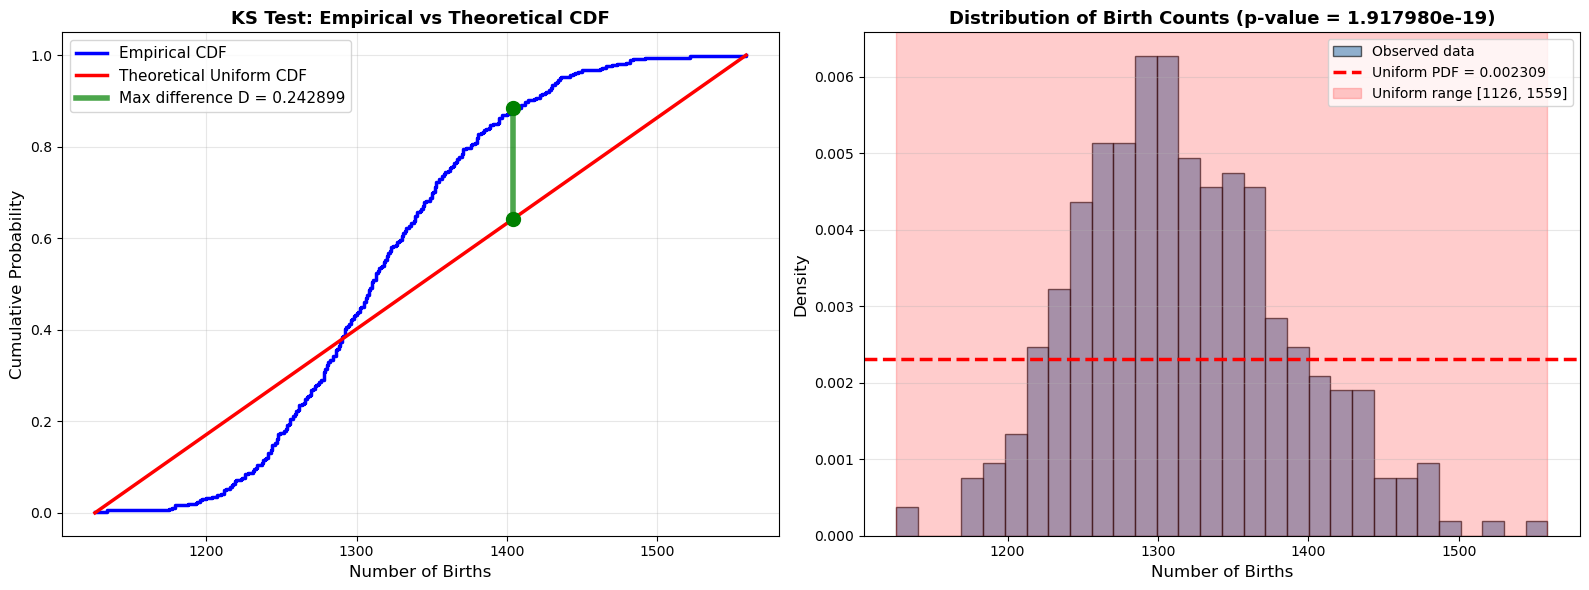


Additional Information:
Maximum difference occurs at:
  Birth count: 1404
  Empirical CDF: 0.8849
  Theoretical CDF: 0.6420
  Difference: 0.242899


In [37]:
## K-S test
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Load the data
try:
    data = np.loadtxt('bdaydata.txt')
    if data.ndim == 2:
        counts = data[:, -1]
    else:
        counts = data
except:
    counts = []
    with open('bdaydata.txt', 'r') as f:
        for line in f:
            line = line.strip()
            if line:
                parts = line.split()
                try:
                    counts.append(float(parts[-1]))
                except:
                    pass
    counts = np.array(counts)

print("="*80)
print("KOLMOGOROV-SMIRNOV TEST FOR UNIFORMITY")
print("="*80)

# Data summary
n_days = len(counts)
total_births = np.sum(counts)
mean_births = np.mean(counts)
min_count = np.min(counts)
max_count = np.max(counts)

print(f"\nData Summary:")
print(f"  Number of days: {n_days}")
print(f"  Total births: {total_births:.0f}")
print(f"  Mean births per day: {mean_births:.2f}")
print(f"  Min births: {min_count:.0f}")
print(f"  Max births: {max_count:.0f}")
print(f"  Range: {max_count - min_count:.0f}")

# KS Test
print(f"\n" + "-"*80)
print("HYPOTHESIS TEST")
print("-"*80)
print(f"H₀: Birth counts follow a uniform distribution U({min_count:.0f}, {max_count:.0f})")
print(f"H₁: Birth counts do NOT follow a uniform distribution")
print(f"Significance level: α = 0.05")

# Uniform distribution parameters
scale = max_count - min_count

# Perform KS test
ks_statistic, p_value = stats.kstest(counts, 'uniform', args=(min_count, scale))

# Critical value (approximation for large n)
critical_value = 1.36 / np.sqrt(n_days)

print(f"\n" + "-"*80)
print("TEST RESULTS")
print("-"*80)
print(f"KS statistic: D = {ks_statistic:.6f}")
print(f"  (Maximum distance between empirical and theoretical CDFs)")
print(f"\nCritical value (α=0.05): ≈ {critical_value:.6f}")
print(f"P-value: {p_value:.6e}")

print(f"\n" + "-"*80)
print("DECISION")
print("-"*80)
if p_value < 0.05:
    print(f"✗ REJECT H₀ (p-value = {p_value:.6e} < 0.05)")
    print(f"\nConclusion: There is strong evidence that birth counts are")
    print(f"NOT uniformly distributed.")
else:
    print(f"✓ FAIL TO REJECT H₀ (p-value = {p_value:.6e} ≥ 0.05)")
    print(f"\nConclusion: The data is consistent with a uniform distribution")
    print(f"of birth counts.")

print("="*80)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Empirical vs Theoretical CDF
ax1 = axes[0]

sorted_counts = np.sort(counts)
n = len(sorted_counts)
empirical_cdf = np.arange(1, n + 1) / n

# Theoretical uniform CDF
theoretical_cdf = (sorted_counts - min_count) / scale

# Plot CDFs
ax1.step(sorted_counts, empirical_cdf, 'b-', linewidth=2.5, 
         where='post', label='Empirical CDF')
ax1.plot(sorted_counts, theoretical_cdf, 'r-', linewidth=2.5, 
         label='Theoretical Uniform CDF')

# Find and mark maximum difference
differences = np.abs(empirical_cdf - theoretical_cdf)
max_diff_idx = np.argmax(differences)
max_diff = differences[max_diff_idx]

ax1.plot([sorted_counts[max_diff_idx], sorted_counts[max_diff_idx]], 
         [empirical_cdf[max_diff_idx], theoretical_cdf[max_diff_idx]], 
         'g-', linewidth=4, alpha=0.7,
         label=f'Max difference D = {ks_statistic:.6f}')

ax1.scatter([sorted_counts[max_diff_idx]], [empirical_cdf[max_diff_idx]], 
            color='green', s=100, zorder=5)
ax1.scatter([sorted_counts[max_diff_idx]], [theoretical_cdf[max_diff_idx]], 
            color='green', s=100, zorder=5)

ax1.set_xlabel('Number of Births', fontsize=12)
ax1.set_ylabel('Cumulative Probability', fontsize=12)
ax1.set_title('KS Test: Empirical vs Theoretical CDF', fontsize=13, fontweight='bold')
ax1.legend(fontsize=11, loc='upper left')
ax1.grid(True, alpha=0.3)

# Plot 2: Histogram with uniform overlay
ax2 = axes[1]

ax2.hist(counts, bins=30, density=True, alpha=0.6, color='steelblue', 
         edgecolor='black', label='Observed data')

# Theoretical uniform PDF
uniform_pdf_height = 1 / scale
ax2.axhline(y=uniform_pdf_height, color='red', linestyle='--', linewidth=2.5,
            label=f'Uniform PDF = {uniform_pdf_height:.6f}')
ax2.axvspan(min_count, max_count, alpha=0.2, color='red', 
            label=f'Uniform range [{min_count:.0f}, {max_count:.0f}]')

ax2.set_xlabel('Number of Births', fontsize=12)
ax2.set_ylabel('Density', fontsize=12)
ax2.set_title(f'Distribution of Birth Counts (p-value = {p_value:.6e})', 
              fontsize=13, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Additional information: where is the maximum difference?
print(f"\nAdditional Information:")
print(f"Maximum difference occurs at:")
print(f"  Birth count: {sorted_counts[max_diff_idx]:.0f}")
print(f"  Empirical CDF: {empirical_cdf[max_diff_idx]:.4f}")
print(f"  Theoretical CDF: {theoretical_cdf[max_diff_idx]:.4f}")
print(f"  Difference: {max_diff:.6f}")

<hr>

**(e)** Since you have an extensive dataset of birthday frequency, you can directly use the nonparametric bootstrap to estimate the probability of at least two people sharing birthdays in a group of $n$. Plot the bootstrap estimate and $95\%$ CI for $n\in\{15,16,\ldots,30\}$, and compare against the plot in part $(b)$.

<hr>

## Ans.


In [38]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Load the data
try:
    data = np.loadtxt('bdaydata.txt')
    if data.ndim == 2:
        counts = data[:, -1]
    else:
        counts = data
except:
    counts = []
    with open('bdaydata.txt', 'r') as f:
        for line in f:
            line = line.strip()
            if line:
                parts = line.split()
                try:
                    counts.append(float(parts[-1]))
                except:
                    pass
    counts = np.array(counts)

print("="*80)
print("NONPARAMETRIC BOOTSTRAP FOR BIRTHDAY PROBLEM")
print("="*80)
print(f"\nData: {len(counts)} days, {np.sum(counts):.0f} total births")
print(f"Mean births per day: {np.mean(counts):.2f}")

# Normalize counts to get probability distribution
probabilities = counts / np.sum(counts)

def simulate_birthday_problem_empirical(n, probs, num_simulations=10000):
    """
    Simulate birthday problem using empirical distribution.
    
    Parameters:
    n: number of people in party
    probs: probability distribution over days
    num_simulations: number of parties to simulate
    
    Returns:
    probability of at least one shared birthday
    """
    shared_count = 0
    n_days = len(probs)
    
    for _ in range(num_simulations):
        # Sample n birthdays from empirical distribution
        birthdays = np.random.choice(n_days, size=n, p=probs)
        
        # Check if any duplicates
        if len(np.unique(birthdays)) < n:
            shared_count += 1
    
    return shared_count / num_simulations

def bootstrap_birthday_probability(n, counts, num_bootstrap=1000, num_sim_per_bootstrap=5000):
    """
    Bootstrap estimate of birthday collision probability.
    
    Parameters:
    n: number of people in party
    counts: observed birthday counts
    num_bootstrap: number of bootstrap samples
    num_sim_per_bootstrap: simulations per bootstrap sample
    
    Returns:
    mean probability, lower CI, upper CI
    """
    bootstrap_probs = []
    
    for b in range(num_bootstrap):
        # Bootstrap resample: sample days with replacement
        bootstrap_counts = np.random.choice(counts, size=len(counts), replace=True)
        bootstrap_probs_dist = bootstrap_counts / np.sum(bootstrap_counts)
        
        # Estimate probability using this bootstrap sample
        prob = simulate_birthday_problem_empirical(n, bootstrap_probs_dist, num_sim_per_bootstrap)
        bootstrap_probs.append(prob)
    
    bootstrap_probs = np.array(bootstrap_probs)
    
    # Calculate mean and 95% CI
    mean_prob = np.mean(bootstrap_probs)
    ci_lower = np.percentile(bootstrap_probs, 2.5)
    ci_upper = np.percentile(bootstrap_probs, 97.5)
    
    return mean_prob, ci_lower, ci_upper

# Theoretical probability (uniform distribution)
def birthday_probability_theory(n):
    """Calculate theoretical probability assuming uniform distribution"""
    if n > 365:
        return 1.0
    prob_all_different = 1.0
    for k in range(n):
        prob_all_different *= (365 - k) / 365
    return 1 - prob_all_different

# Run bootstrap for n = 15 to 30
np.random.seed(42)
n_values = range(15, 31)
num_bootstrap_samples = 500  # Number of bootstrap resamples
num_simulations = 5000       # Simulations per bootstrap sample

print(f"\nBootstrap Settings:")
print(f"  n values: {min(n_values)} to {max(n_values)}")
print(f"  Bootstrap samples: {num_bootstrap_samples}")
print(f"  Simulations per bootstrap: {num_simulations}")
print(f"\nThis may take a few minutes...")

results_bootstrap = []
results_uniform = []

for i, n in enumerate(n_values):
    print(f"Processing n={n}... ({i+1}/{len(n_values)})")
    
    # Bootstrap estimate using empirical distribution
    mean_prob, ci_lower, ci_upper = bootstrap_birthday_probability(
        n, counts, num_bootstrap_samples, num_simulations
    )
    
    # Theoretical uniform probability
    theory_prob = birthday_probability_theory(n)
    
    results_bootstrap.append({
        'n': n,
        'mean': mean_prob,
        'ci_lower': ci_lower,
        'ci_upper': ci_upper
    })
    
    results_uniform.append({
        'n': n,
        'prob': theory_prob
    })
    
    print(f"  Bootstrap: {mean_prob:.4f} [{ci_lower:.4f}, {ci_upper:.4f}]")
    print(f"  Uniform:   {theory_prob:.4f}")

print("\nBootstrap complete!")
print("="*80)

NONPARAMETRIC BOOTSTRAP FOR BIRTHDAY PROBLEM

Data: 365 days, 480715 total births
Mean births per day: 1317.03

Bootstrap Settings:
  n values: 15 to 30
  Bootstrap samples: 500
  Simulations per bootstrap: 5000

This may take a few minutes...
Processing n=15... (1/16)
  Bootstrap: 0.2533 [0.2417, 0.2649]
  Uniform:   0.2529
Processing n=16... (2/16)
  Bootstrap: 0.2841 [0.2714, 0.2964]
  Uniform:   0.2836
Processing n=17... (3/16)
  Bootstrap: 0.3157 [0.3011, 0.3295]
  Uniform:   0.3150
Processing n=18... (4/16)
  Bootstrap: 0.3483 [0.3349, 0.3612]
  Uniform:   0.3469
Processing n=19... (5/16)
  Bootstrap: 0.3801 [0.3660, 0.3928]
  Uniform:   0.3791
Processing n=20... (6/16)
  Bootstrap: 0.4124 [0.3994, 0.4259]
  Uniform:   0.4114
Processing n=21... (7/16)
  Bootstrap: 0.4443 [0.4312, 0.4572]
  Uniform:   0.4437
Processing n=22... (8/16)
  Bootstrap: 0.4760 [0.4628, 0.4906]
  Uniform:   0.4757
Processing n=23... (9/16)
  Bootstrap: 0.5079 [0.4930, 0.5219]
  Uniform:   0.5073
Processin

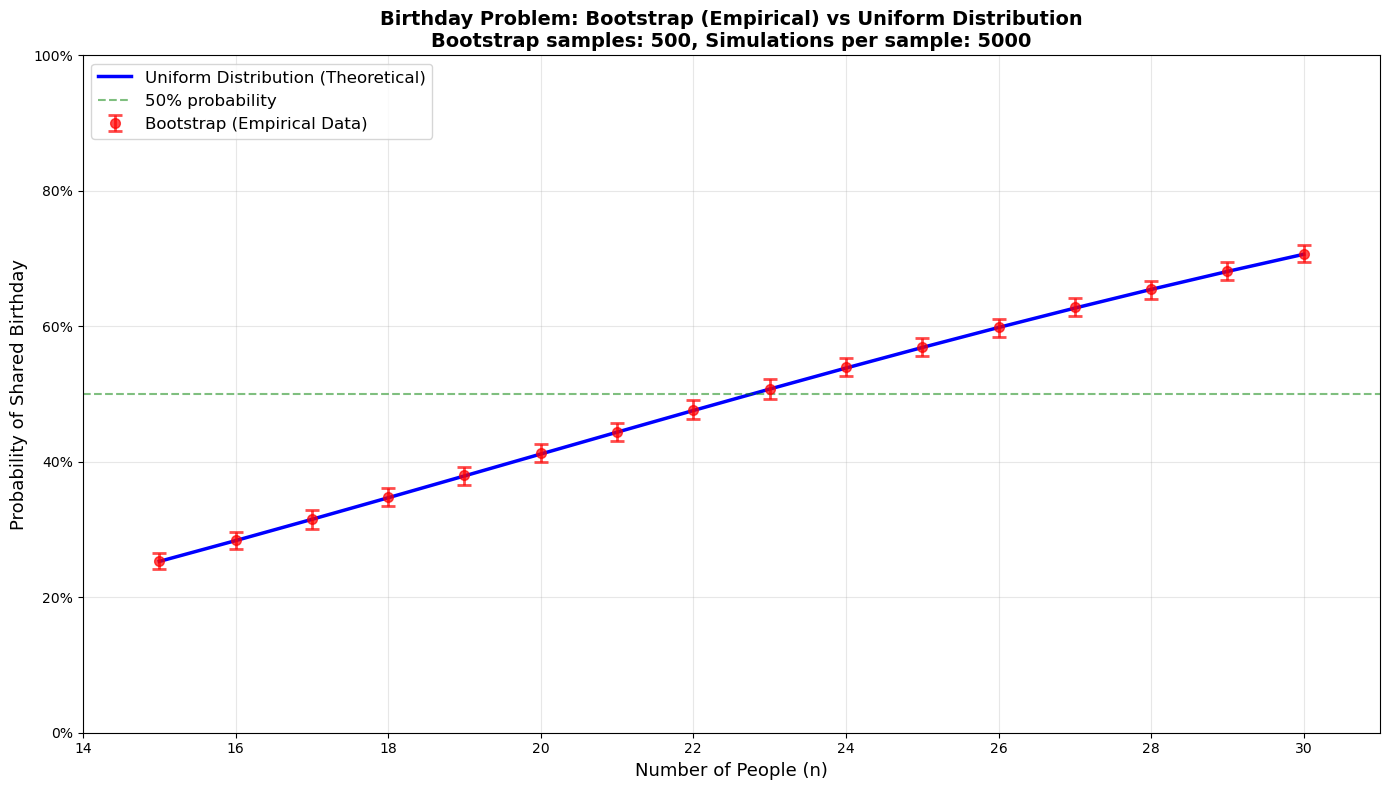


COMPARISON: BOOTSTRAP (EMPIRICAL) vs UNIFORM DISTRIBUTION
n     Bootstrap    95% CI Lower   95% CI Upper   Uniform      Difference  
----------------------------------------------------------------------------------------------------
15    0.2533       0.2417         0.2649         0.2529            +0.0004
16    0.2841       0.2714         0.2964         0.2836            +0.0005
17    0.3157       0.3011         0.3295         0.3150            +0.0007
18    0.3483       0.3349         0.3612         0.3469            +0.0014
19    0.3801       0.3660         0.3928         0.3791            +0.0009
20    0.4124       0.3994         0.4259         0.4114            +0.0009
21    0.4443       0.4312         0.4572         0.4437            +0.0006
22    0.4760       0.4628         0.4906         0.4757            +0.0003
23    0.5079       0.4930         0.5219         0.5073            +0.0006
24    0.5398       0.5268         0.5535         0.5383            +0.0014
25    0.5696   

In [40]:
# Extract data for plotting
n_vals = [r['n'] for r in results_bootstrap]
bootstrap_mean = [r['mean'] for r in results_bootstrap]
bootstrap_lower = [r['ci_lower'] for r in results_bootstrap]
bootstrap_upper = [r['ci_upper'] for r in results_bootstrap]
uniform_probs = [r['prob'] for r in results_uniform]

# Create the comparison plot
plt.figure(figsize=(14, 8))

# Plot bootstrap estimates with confidence intervals
plt.errorbar(n_vals, bootstrap_mean, 
             yerr=[np.array(bootstrap_mean) - np.array(bootstrap_lower),
                   np.array(bootstrap_upper) - np.array(bootstrap_mean)],
             fmt='o', color='red', markersize=7, capsize=5, capthick=2,
             elinewidth=2, alpha=0.7, label='Bootstrap (Empirical Data)', zorder=3)

# Plot uniform distribution results
plt.plot(n_vals, uniform_probs, 'b-', linewidth=2.5, 
         label='Uniform Distribution (Theoretical)', zorder=2)

# Add 50% reference line
plt.axhline(y=0.5, color='green', linestyle='--', linewidth=1.5, 
            alpha=0.5, label='50% probability')

# Formatting
plt.xlabel('Number of People (n)', fontsize=13)
plt.ylabel('Probability of Shared Birthday', fontsize=13)
plt.title('Birthday Problem: Bootstrap (Empirical) vs Uniform Distribution\n' + 
          f'Bootstrap samples: {num_bootstrap_samples}, Simulations per sample: {num_simulations}',
          fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12, loc='upper left')
plt.xlim(14, 31)
plt.ylim(0, 1)

# Format y-axis as percentages
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y*100:.0f}%'))

plt.tight_layout()
plt.show()

# Print comparison table
print("\n" + "="*100)
print("COMPARISON: BOOTSTRAP (EMPIRICAL) vs UNIFORM DISTRIBUTION")
print("="*100)
print(f"{'n':<5} {'Bootstrap':<12} {'95% CI Lower':<14} {'95% CI Upper':<14} "
      f"{'Uniform':<12} {'Difference':<12}")
print("-"*100)

for i, n in enumerate(n_vals):
    diff = bootstrap_mean[i] - uniform_probs[i]
    print(f"{n:<5} {bootstrap_mean[i]:<12.4f} {bootstrap_lower[i]:<14.4f} "
          f"{bootstrap_upper[i]:<14.4f} {uniform_probs[i]:<12.4f} {diff:+12.4f}")

print("="*100)

# Summary statistics
differences = np.array(bootstrap_mean) - np.array(uniform_probs)
print(f"\nSummary of Differences (Bootstrap - Uniform):")
print(f"  Mean difference: {np.mean(differences):+.4f}")
print(f"  Std deviation: {np.std(differences):.4f}")
print(f"  Min difference: {np.min(differences):+.4f} (at n={n_vals[np.argmin(differences)]})")
print(f"  Max difference: {np.max(differences):+.4f} (at n={n_vals[np.argmax(differences)]})")

# Check if uniform probabilities fall within bootstrap CIs
within_ci = sum(1 for i in range(len(n_vals)) 
                if bootstrap_lower[i] <= uniform_probs[i] <= bootstrap_upper[i])
print(f"\nUniform probabilities within bootstrap 95% CI: {within_ci}/{len(n_vals)} cases")

<hr><hr>

# Question 4: Benford's Law (30 pts)

In this question, we will use the Chi-square test to study *Benford's law* in a variety of setttings. Consider a data set consisting of $n$ different numbers, and look at the leading digit of each number (for example, the leading digit of $123.456$ is $1$, and the leading digit of $-0.423$ is $4$). For many data sets, the fraction of leading digits that equal $1$ is much higher than $1/9$ (i.e., what it would be if uniformlly distributed); in fact, the probability distribution of the different leading digits $1, 2, \ldots, 9$ is far from uniform.

This observation has been observed to hold in measurements of distances to galaxies, numbers appearing in tax forms and many other settings, and has been used to detect fraud among other uses. See [the Wikipedia page](https://en.wikipedia.org/wiki/Benford\%27s_law) for a description of this phenomena, and [this blog post](https://terrytao.wordpress.com/2009/07/03/benfords-law-zipfs-law-and-the-pareto-distribution/) for an interesting related discussion. More recently, this has also been (supposedly) misused in (supposedly) detecting (supposed) fraud in election results -- see [this Stand-Up Maths](https://www.youtube.com/watch?v=etx0k1nLn78&t=4s) video for a great example of how data analysis should be done!



<hr>

**(a)** First, we will study this phenomena in a *synthetic* dataset. For this, compute the first digits of $n!$ for the first $1500$ integers, and plot their empirical histogram. You can use the code fragment provided to generate the first $n$ factorials, or write your own.

<hr>

## Ans.

In [ ]:
#from scipy.misc import factorial
#fact_series = factorial(np.arange(n),exact=True)
#first_digit = np.zeros(n)
#for i in range(n):
# first_digit[i] = int(str(fact_series[i])[0])

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Generate factorials and extract first digits
n = 1500
print(f"Computing factorials for n = 1 to {n}...")

first_digit = np.zeros(n)

for i in range(n):
    # Compute factorial of (i+1) using Python's built-in math module
    fact = math.factorial(i + 1)
    
    # Extract first digit by converting to string
    first_digit[i] = int(str(fact)[0])

print(f"Completed! Generated {n} factorial values.")

# Show some examples
print("\nFirst 10 examples:")
for i in range(10):
    fact = math.factorial(i + 1)
    print(f"{i+1}! = {fact}, leading digit = {int(first_digit[i])}")

# Count frequency of each digit (1-9)
digit_counts = np.zeros(9)
for d in range(1, 10):
    digit_counts[d-1] = np.sum(first_digit == d)

print(f"\n" + "="*60)
print("Frequency of Leading Digits")
print("="*60)
print(f"{'Digit':<10} {'Count':<10} {'Proportion':<15} {'Percentage'}")
print("-"*60)

for d in range(1, 10):
    count = int(digit_counts[d-1])
    prop = digit_counts[d-1] / n
    print(f"{d:<10} {count:<10} {prop:<15.4f} {prop*100:.2f}%")

print("="*60)

Computing factorials for n = 1 to 1500...
Completed! Generated 1500 factorial values.

First 10 examples:
1! = 1, leading digit = 1
2! = 2, leading digit = 2
3! = 6, leading digit = 6
4! = 24, leading digit = 2
5! = 120, leading digit = 1
6! = 720, leading digit = 7
7! = 5040, leading digit = 5
8! = 40320, leading digit = 4
9! = 362880, leading digit = 3
10! = 3628800, leading digit = 3

Frequency of Leading Digits
Digit      Count      Proportion      Percentage
------------------------------------------------------------
1          437        0.2913          29.13%
2          255        0.1700          17.00%
3          183        0.1220          12.20%
4          164        0.1093          10.93%
5          112        0.0747          7.47%
6          124        0.0827          8.27%
7          80         0.0533          5.33%
8          77         0.0513          5.13%
9          68         0.0453          4.53%


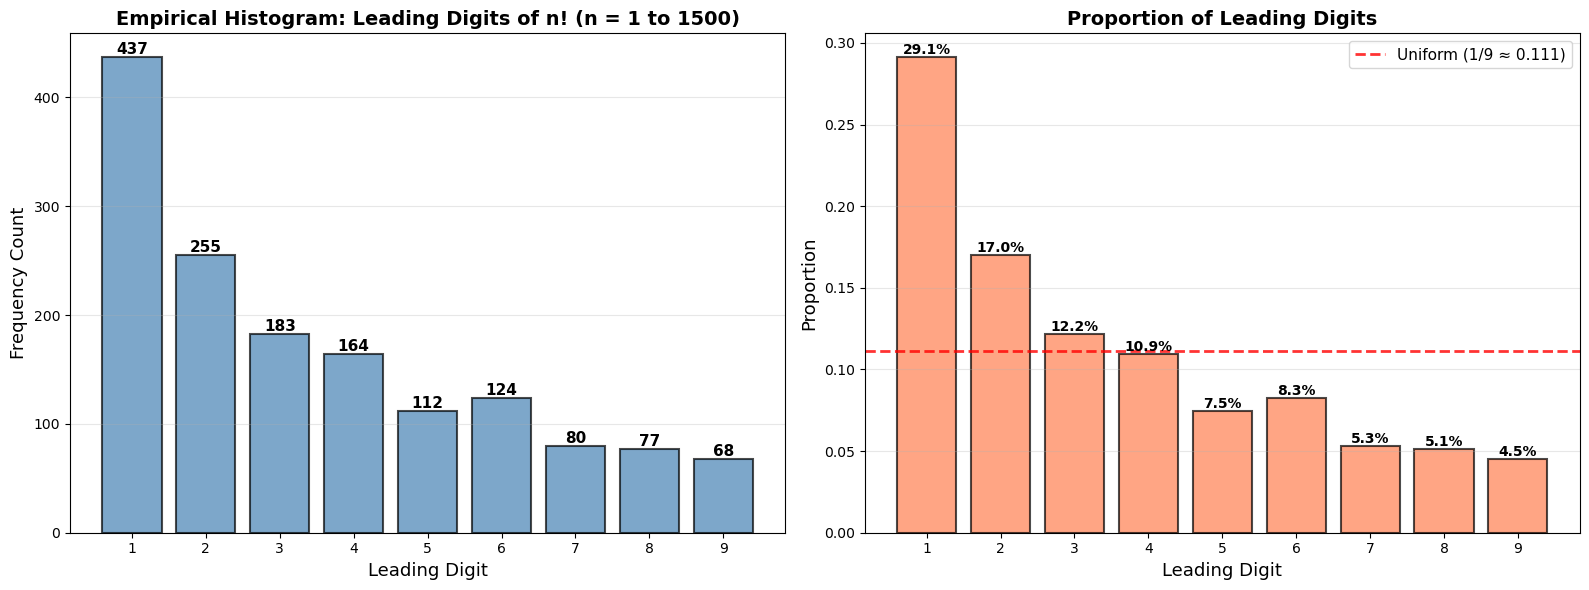


Summary Statistics:
  Most common leading digit: 1 (appears 437 times, 29.13%)
  Least common leading digit: 9 (appears 68 times, 4.53%)
  If uniform, each digit would appear: 166.7 times (11.11%)


In [44]:
# Create the empirical histogram
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Counts
ax1 = axes[0]
digits = np.arange(1, 10)
bars1 = ax1.bar(digits, digit_counts, alpha=0.7, color='steelblue', 
                edgecolor='black', linewidth=1.5)

ax1.set_xlabel('Leading Digit', fontsize=13)
ax1.set_ylabel('Frequency Count', fontsize=13)
ax1.set_title(f'Empirical Histogram: Leading Digits of n! (n = 1 to {n})', 
              fontsize=14, fontweight='bold')
ax1.set_xticks(digits)
ax1.grid(True, alpha=0.3, axis='y')

# Add count labels on top of bars
for i, bar in enumerate(bars1):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}', ha='center', va='bottom', fontsize=11, fontweight='bold')

# Plot 2: Proportions
ax2 = axes[1]
proportions = digit_counts / n
bars2 = ax2.bar(digits, proportions, alpha=0.7, color='coral', 
                edgecolor='black', linewidth=1.5)

# Add uniform distribution reference line
uniform_prob = 1/9
ax2.axhline(y=uniform_prob, color='red', linestyle='--', linewidth=2, 
            label=f'Uniform (1/9 ≈ {uniform_prob:.3f})', alpha=0.8)

ax2.set_xlabel('Leading Digit', fontsize=13)
ax2.set_ylabel('Proportion', fontsize=13)
ax2.set_title(f'Proportion of Leading Digits', fontsize=14, fontweight='bold')
ax2.set_xticks(digits)
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3, axis='y')

# Add percentage labels on top of bars
for i, bar in enumerate(bars2):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{height*100:.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Additional statistics
print(f"\nSummary Statistics:")
print(f"  Most common leading digit: {np.argmax(digit_counts) + 1} "
      f"(appears {int(np.max(digit_counts))} times, {np.max(digit_counts)/n*100:.2f}%)")
print(f"  Least common leading digit: {np.argmin(digit_counts) + 1} "
      f"(appears {int(np.min(digit_counts))} times, {np.min(digit_counts)/n*100:.2f}%)")
print(f"  If uniform, each digit would appear: {n/9:.1f} times ({100/9:.2f}%)")

<hr>

**(b)** Use a Chi-square test to determine how well the data can be modeled using a uniform distribution.

<hr>

## Ans.

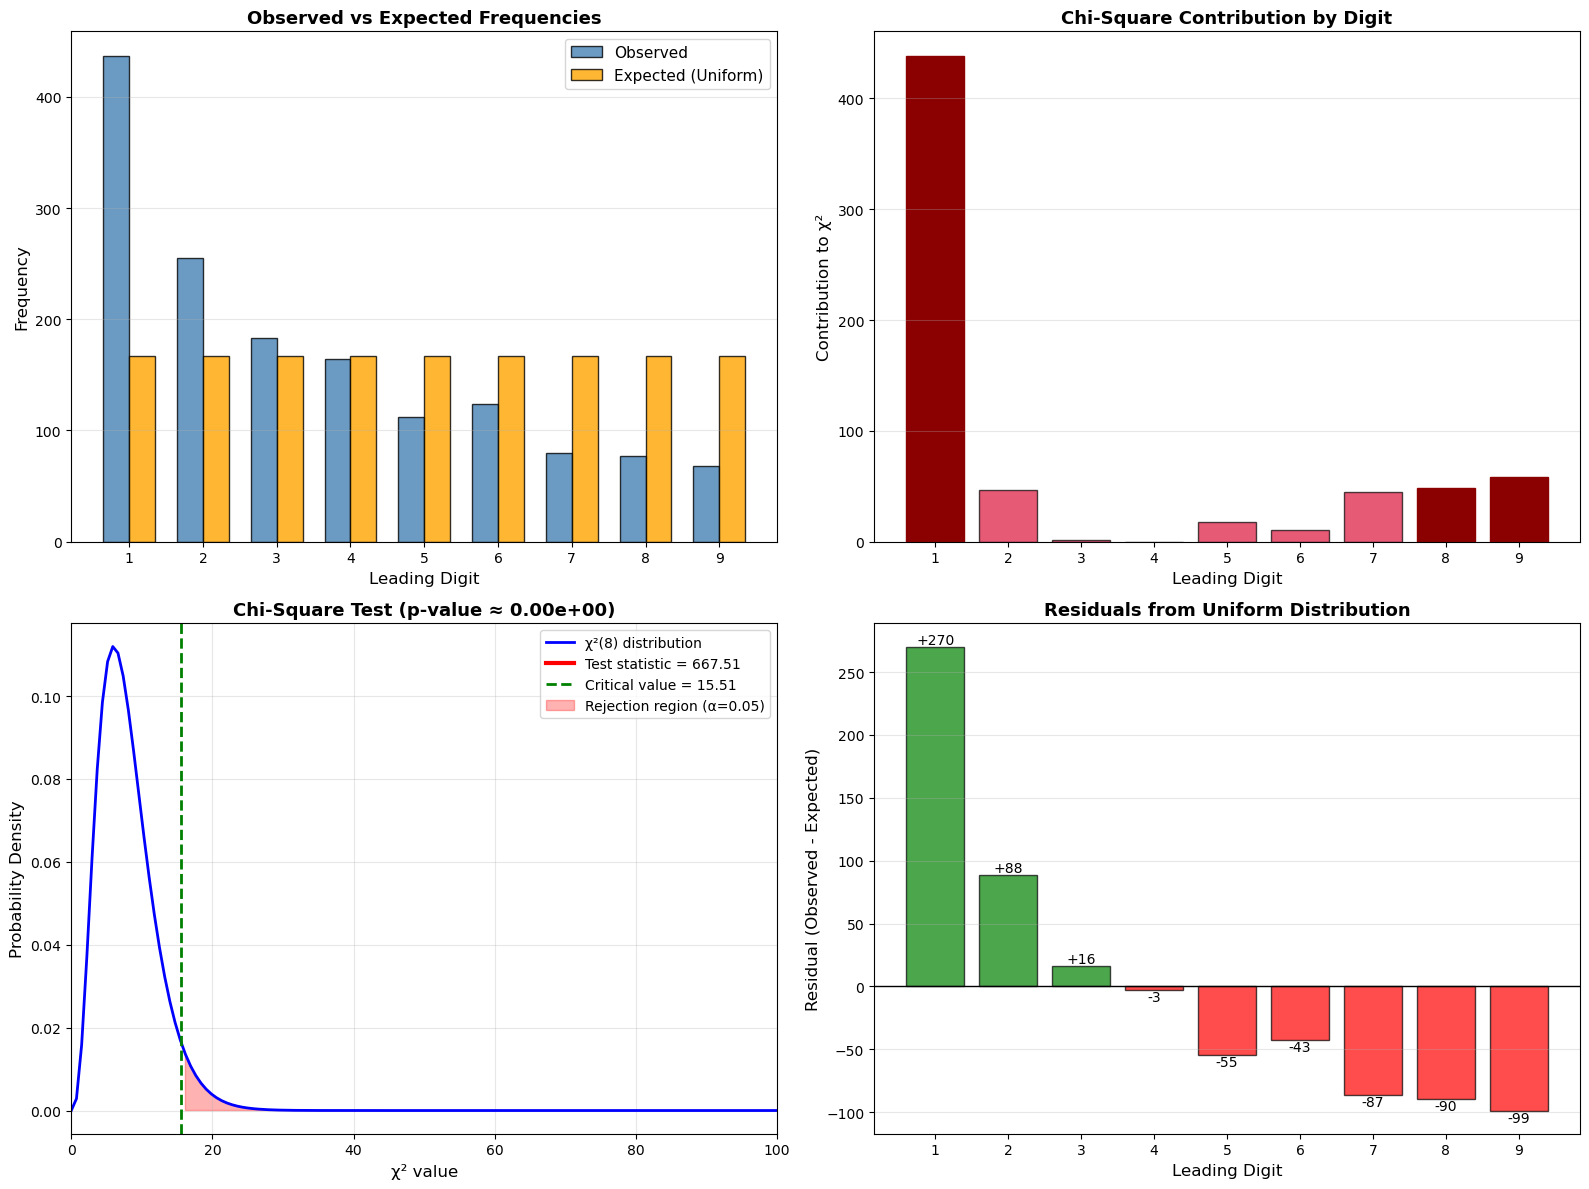


Visualization complete!
Chi-square statistic: 667.51
P-value: 0.00e+00


In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

try:
    n = len(first_digit)
    digit_counts = np.zeros(9)
    for d in range(1, 10):
        digit_counts[d-1] = np.sum(first_digit == d)
except:
    print("Regenerating data...")
    import math
    n = 1500
    first_digit = np.zeros(n)
    for i in range(n):
        fact = math.factorial(i + 1)
        first_digit[i] = int(str(fact)[0])
    
    digit_counts = np.zeros(9)
    for d in range(1, 10):
        digit_counts[d-1] = np.sum(first_digit == d)

# Define all needed variables
observed_counts = digit_counts
expected_count = n / 9
expected_counts = np.full(9, expected_count)
chi_square_stat = np.sum((observed_counts - expected_counts)**2 / expected_counts)
df = 8
p_value = 1 - stats.chi2.cdf(chi_square_stat, df)
critical_value = stats.chi2.ppf(0.95, df)
contributions = (observed_counts - expected_counts)**2 / expected_counts
top_contributors_idx = np.argsort(contributions)[-3:][::-1]

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Observed vs Expected counts
ax1 = axes[0, 0]
digits = np.arange(1, 10)
x = np.arange(len(digits))
width = 0.35

bars1 = ax1.bar(x - width/2, observed_counts, width, label='Observed', 
                alpha=0.8, color='steelblue', edgecolor='black')
bars2 = ax1.bar(x + width/2, expected_counts, width, label='Expected (Uniform)', 
                alpha=0.8, color='orange', edgecolor='black')

ax1.set_xlabel('Leading Digit', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)
ax1.set_title('Observed vs Expected Frequencies', fontsize=13, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(digits)
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3, axis='y')

# Plot 2: Contribution to chi-square by digit
ax2 = axes[0, 1]
bars = ax2.bar(digits, contributions, alpha=0.7, color='crimson', edgecolor='black')
ax2.set_xlabel('Leading Digit', fontsize=12)
ax2.set_ylabel('Contribution to χ²', fontsize=12)
ax2.set_title('Chi-Square Contribution by Digit', fontsize=13, fontweight='bold')
ax2.set_xticks(digits)
ax2.grid(True, alpha=0.3, axis='y')

# Highlight top contributors
for idx in top_contributors_idx:
    bars[idx].set_color('darkred')
    bars[idx].set_alpha(1.0)

# Plot 3: Chi-square distribution
ax3 = axes[1, 0]
x_range = np.linspace(0, max(chi_square_stat * 1.1, critical_value * 2), 1000)
y = stats.chi2.pdf(x_range, df)

ax3.plot(x_range, y, 'b-', linewidth=2, label=f'χ²({df}) distribution')
ax3.axvline(chi_square_stat, color='red', linestyle='-', linewidth=3, 
            label=f'Test statistic = {chi_square_stat:.2f}')
ax3.axvline(critical_value, color='green', linestyle='--', linewidth=2,
            label=f'Critical value = {critical_value:.2f}')

# Shade rejection region
x_reject = x_range[x_range >= critical_value]
ax3.fill_between(x_reject, 0, stats.chi2.pdf(x_reject, df),
                 alpha=0.3, color='red', label='Rejection region (α=0.05)')

ax3.set_xlabel('χ² value', fontsize=12)
ax3.set_ylabel('Probability Density', fontsize=12)
ax3.set_title(f'Chi-Square Test (p-value ≈ {p_value:.2e})', fontsize=13, fontweight='bold')
ax3.legend(fontsize=10)
ax3.grid(True, alpha=0.3)
ax3.set_xlim(0, min(chi_square_stat * 1.2, 100))

# Plot 4: Residuals
ax4 = axes[1, 1]
residuals = observed_counts - expected_counts
colors = ['red' if r < 0 else 'green' for r in residuals]
bars_resid = ax4.bar(digits, residuals, alpha=0.7, color=colors, edgecolor='black')
ax4.axhline(y=0, color='black', linestyle='-', linewidth=1)
ax4.set_xlabel('Leading Digit', fontsize=12)
ax4.set_ylabel('Residual (Observed - Expected)', fontsize=12)
ax4.set_title('Residuals from Uniform Distribution', fontsize=13, fontweight='bold')
ax4.set_xticks(digits)
ax4.grid(True, alpha=0.3, axis='y')

# Add value labels
for i, (d, r) in enumerate(zip(digits, residuals)):
    ax4.text(d, r, f'{r:+.0f}', ha='center', 
             va='bottom' if r > 0 else 'top', fontsize=10)

plt.tight_layout()
plt.show()

print(f"\nVisualization complete!")
print(f"Chi-square statistic: {chi_square_stat:.2f}")
print(f"P-value: {p_value:.2e}")

<hr>

**(c)** Next, use a Chi-square test to test how well the data is modeled using the 'Benford's Law' distribution:
$$p(d)= \log _{10}(d+1)-\log _{10}(d), \quad d\in\{1,2,\ldots,9\}$$


<hr>

CHI-SQUARE GOODNESS-OF-FIT TEST: BENFORD'S LAW

Benford's Law Probabilities:
Digit    Probability     Percentage
---------------------------------------------
1        0.301030        30.10%
2        0.176091        17.61%
3        0.124939        12.49%
4        0.096910        9.69%
5        0.079181        7.92%
6        0.066947        6.69%
7        0.057992        5.80%
8        0.051153        5.12%
9        0.045757        4.58%

--------------------------------------------------------------------------------
HYPOTHESIS TEST
--------------------------------------------------------------------------------
H₀: Leading digits follow Benford's Law
    p(d) = log₁₀(1 + 1/d) for d ∈ {1,2,...,9}
H₁: Leading digits do NOT follow Benford's Law
Significance level: α = 0.05

--------------------------------------------------------------------------------
TEST RESULTS
--------------------------------------------------------------------------------
Chi-square statistic: χ² = 9.7683
Degrees 

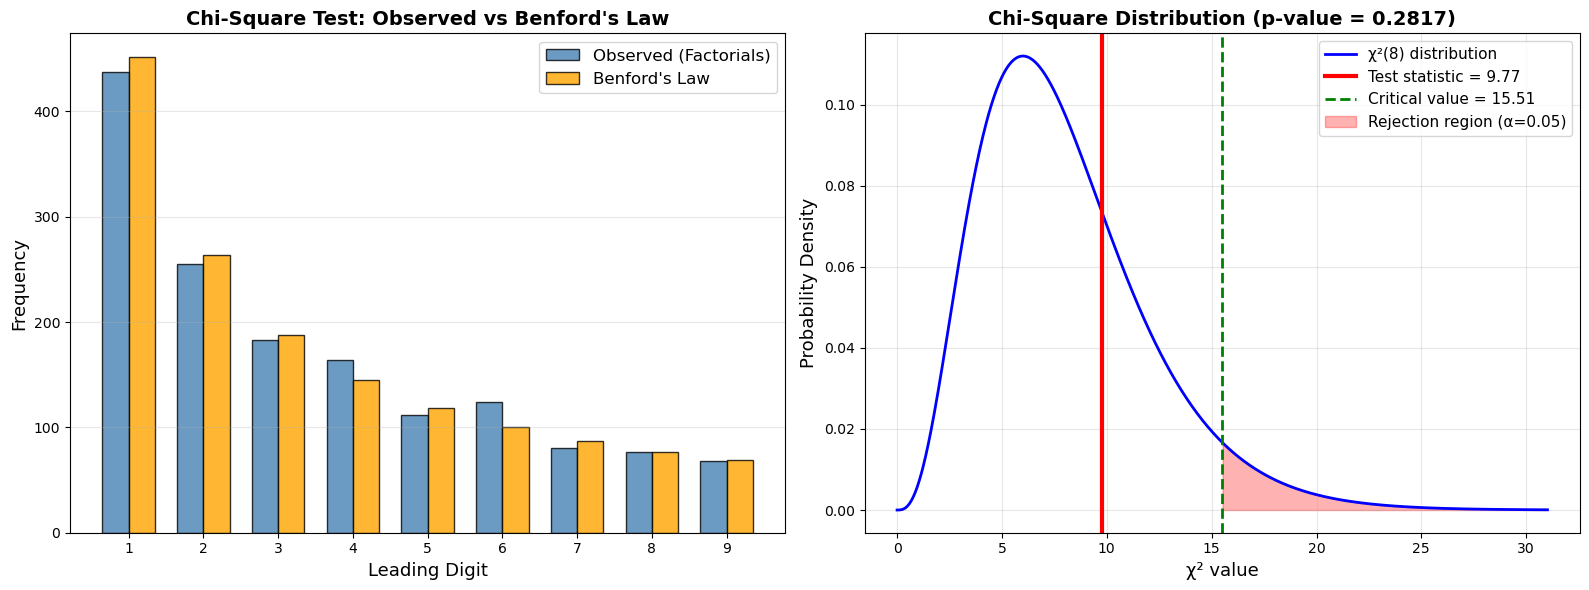

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

try:
    n = len(first_digit)
    digit_counts = np.zeros(9)
    for d in range(1, 10):
        digit_counts[d-1] = np.sum(first_digit == d)
except:
    print("Regenerating factorial data...")
    import math
    n = 1500
    first_digit = np.zeros(n)
    for i in range(n):
        fact = math.factorial(i + 1)
        first_digit[i] = int(str(fact)[0])
    
    digit_counts = np.zeros(9)
    for d in range(1, 10):
        digit_counts[d-1] = np.sum(first_digit == d)

print("="*80)
print("CHI-SQUARE GOODNESS-OF-FIT TEST: BENFORD'S LAW")
print("="*80)

# Calculate Benford's Law probabilities
digits = np.arange(1, 10)
benford_probs = np.log10(1 + 1/digits)

print("\nBenford's Law Probabilities:")
print(f"{'Digit':<8} {'Probability':<15} {'Percentage'}")
print("-"*45)
for d in digits:
    prob = benford_probs[d-1]
    print(f"{d:<8} {prob:<15.6f} {prob*100:.2f}%")

# Observed counts
observed_counts = digit_counts

# Expected counts under Benford's Law
expected_counts = n * benford_probs

print(f"\n" + "-"*80)
print("HYPOTHESIS TEST")
print("-"*80)
print(f"H₀: Leading digits follow Benford's Law")
print(f"    p(d) = log₁₀(1 + 1/d) for d ∈ {{1,2,...,9}}")
print(f"H₁: Leading digits do NOT follow Benford's Law")
print(f"Significance level: α = 0.05")

# Calculate chi-square statistic
chi_square_stat = np.sum((observed_counts - expected_counts)**2 / expected_counts)

# Degrees of freedom (k - 1, where k = 9)
df = 8

# P-value
p_value = 1 - stats.chi2.cdf(chi_square_stat, df)

# Critical value at alpha = 0.05
critical_value = stats.chi2.ppf(0.95, df)

print(f"\n" + "-"*80)
print("TEST RESULTS")
print("-"*80)
print(f"Chi-square statistic: χ² = {chi_square_stat:.4f}")
print(f"Degrees of freedom: df = {df}")
print(f"Critical value (α=0.05): {critical_value:.4f}")
print(f"P-value: {p_value:.6f}")

print(f"\n" + "-"*80)
print("DECISION")
print("-"*80)

if p_value < 0.05:
    print(f"✗ REJECT H₀ (p-value = {p_value:.6f} < 0.05)")
    print(f"\nConclusion: Leading digits of factorials do NOT follow Benford's Law.")
else:
    print(f"✓ FAIL TO REJECT H₀ (p-value = {p_value:.6f} ≥ 0.05)")
    print(f"\nConclusion: The data is consistent with Benford's Law.")
    print(f"Leading digits of factorials follow Benford's Law!")

# Detailed breakdown
print(f"\n" + "-"*80)
print("DETAILED BREAKDOWN: OBSERVED vs EXPECTED (BENFORD)")
print("-"*80)
print(f"{'Digit':<8} {'Observed':<12} {'Expected':<12} {'(O-E)':<12} {'(O-E)²/E':<12}")
print("-"*80)

contributions = (observed_counts - expected_counts)**2 / expected_counts
for d in digits:
    obs = observed_counts[d-1]
    exp = expected_counts[d-1]
    diff = obs - exp
    contrib = contributions[d-1]
    print(f"{d:<8} {obs:<12.0f} {exp:<12.2f} {diff:<+12.2f} {contrib:<12.4f}")

print("-"*80)
print(f"{'TOTAL':<8} {np.sum(observed_counts):<12.0f} {np.sum(expected_counts):<12.2f} "
      f"{'---':<12} {chi_square_stat:<12.4f}")
print("="*80)

# Calculate goodness of fit measure
observed_probs = observed_counts / n
mse = np.mean((observed_probs - benford_probs)**2)

print(f"\nGoodness of Fit:")
print(f"  Mean Squared Error: {mse:.8f}")
print(f"  (Lower is better - measures deviation from Benford)")

# Create visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Observed vs Benford comparison
ax1 = axes[0]
x = np.arange(1, 10)
width = 0.35

bars1 = ax1.bar(x - width/2, observed_counts, width, label='Observed (Factorials)', 
                alpha=0.8, color='steelblue', edgecolor='black')
bars2 = ax1.bar(x + width/2, expected_counts, width, label="Benford's Law", 
                alpha=0.8, color='orange', edgecolor='black')

ax1.set_xlabel('Leading Digit', fontsize=13)
ax1.set_ylabel('Frequency', fontsize=13)
ax1.set_title("Chi-Square Test: Observed vs Benford's Law", fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.legend(fontsize=12)
ax1.grid(True, alpha=0.3, axis='y')

# Plot 2: Chi-square distribution
ax2 = axes[1]
x_range = np.linspace(0, max(chi_square_stat * 1.5, critical_value * 2), 1000)
y = stats.chi2.pdf(x_range, df)

ax2.plot(x_range, y, 'b-', linewidth=2, label=f'χ²({df}) distribution')
ax2.axvline(chi_square_stat, color='red', linestyle='-', linewidth=3, 
            label=f'Test statistic = {chi_square_stat:.2f}')
ax2.axvline(critical_value, color='green', linestyle='--', linewidth=2,
            label=f'Critical value = {critical_value:.2f}')

# Shade rejection region
x_reject = x_range[x_range >= critical_value]
ax2.fill_between(x_reject, 0, stats.chi2.pdf(x_reject, df),
                 alpha=0.3, color='red', label='Rejection region (α=0.05)')

ax2.set_xlabel('χ² value', fontsize=13)
ax2.set_ylabel('Probability Density', fontsize=13)
ax2.set_title(f"Chi-Square Distribution (p-value = {p_value:.4f})", 
              fontsize=14, fontweight='bold')
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*80)


<hr>

**(d)** Finally, we will repeat this analysis with a more natural dataset. The dataset `us_pop.csv` contains the US population in 100,000 different zip codes in the year 2010, and the numbers range from less than ten to almost 100,000. As above, compute the histogram of the leading digits, and use the Chi-square test to see how well the data is modeled via the uniform and the Benford's law distributions.

<hr>

## Ans.

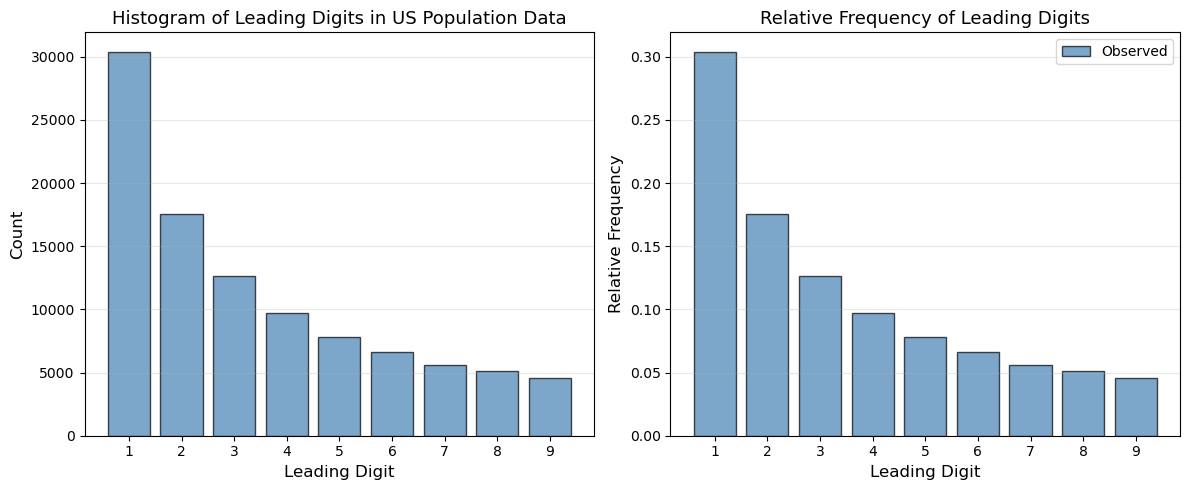

US POPULATION DATA - BENFORD'S LAW ANALYSIS

Total number of data points: 100000

Observed counts and frequencies:
----------------------------------------
Digit 1: 30420 (0.3042)
Digit 2: 17560 (0.1756)
Digit 3: 12615 (0.1262)
Digit 4:  9702 (0.0970)
Digit 5:  7841 (0.0784)
Digit 6:  6594 (0.0659)
Digit 7:  5637 (0.0564)
Digit 8:  5088 (0.0509)
Digit 9:  4543 (0.0454)

CHI-SQUARE TEST: UNIFORM DISTRIBUTION

Null Hypothesis: The data follows a uniform distribution
Chi-square statistic: 50323.5357
p-value: 0.000000
Degrees of freedom: 8

Conclusion: Reject the null hypothesis (p < 0.05)
The data does NOT follow a uniform distribution.

CHI-SQUARE TEST: BENFORD'S LAW

Null Hypothesis: The data follows Benford's Law
Chi-square statistic: 11.8432
p-value: 0.158337
Degrees of freedom: 8

Conclusion: Fail to reject the null hypothesis (p >= 0.05)
The data is consistent with Benford's Law.


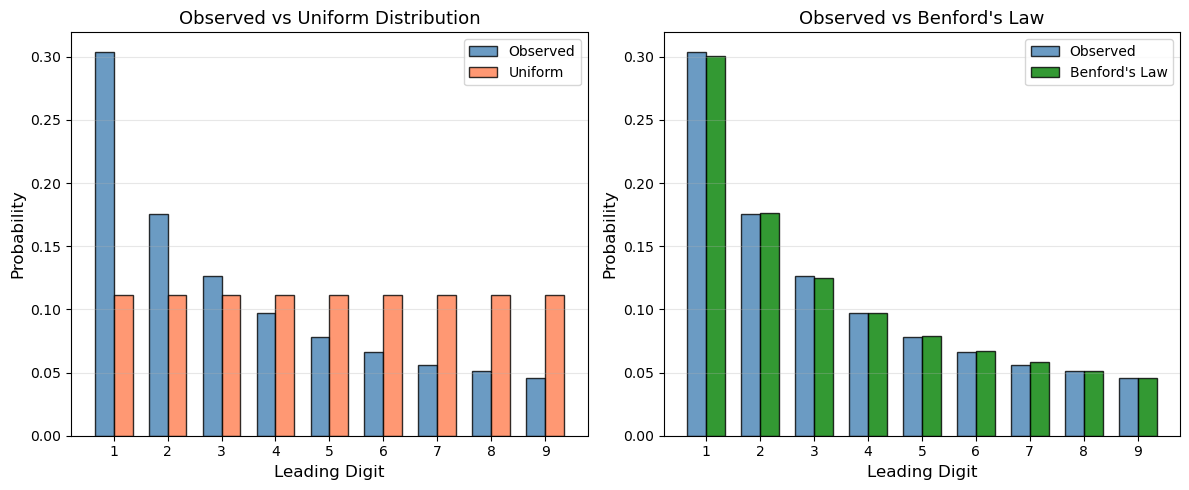


SUMMARY
Uniform distribution p-value: 0.000000
Benford's Law p-value: 0.158337

Better fit: Benford's Law


In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chisquare

# Read the US population data
# Make sure 'us_pop.csv' is in the same directory or provide full path
df = pd.read_csv('us_pop.csv')

# Extract population column (first column based on the screenshot)
population = df['population'].values

# Function to get the first digit
def get_first_digit(num):
    num = abs(num)
    if num == 0:
        return None
    while num < 1:
        num *= 10
    while num >= 10:
        num /= 10
    return int(num)

# Get first digits for all population values
first_digits = []
for pop in population:
    if pop > 0:  # Only consider positive numbers
        digit = get_first_digit(pop)
        if digit is not None:
            first_digits.append(digit)

first_digits = np.array(first_digits)

# Count occurrences of each digit
digit_counts = np.zeros(9)
for d in range(1, 10):
    digit_counts[d-1] = np.sum(first_digits == d)

# Calculate observed frequencies
n = len(first_digits)
observed_freq = digit_counts / n

# Plot histogram
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(range(1, 10), digit_counts, alpha=0.7, color='steelblue', edgecolor='black')
plt.xlabel('Leading Digit', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of Leading Digits in US Population Data', fontsize=13)
plt.xticks(range(1, 10))
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
plt.bar(range(1, 10), observed_freq, alpha=0.7, color='steelblue', 
        edgecolor='black', label='Observed')
plt.xlabel('Leading Digit', fontsize=12)
plt.ylabel('Relative Frequency', fontsize=12)
plt.title('Relative Frequency of Leading Digits', fontsize=13)
plt.xticks(range(1, 10))
plt.grid(axis='y', alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

print("=" * 70)
print("US POPULATION DATA - BENFORD'S LAW ANALYSIS")
print("=" * 70)
print(f"\nTotal number of data points: {n}")
print("\nObserved counts and frequencies:")
print("-" * 40)
for d in range(1, 10):
    print(f"Digit {d}: {int(digit_counts[d-1]):5d} ({observed_freq[d-1]:.4f})")

# Chi-square test for UNIFORM distribution
print("\n" + "=" * 70)
print("CHI-SQUARE TEST: UNIFORM DISTRIBUTION")
print("=" * 70)

uniform_prob = np.ones(9) / 9
expected_uniform = n * uniform_prob

chi2_uniform, p_value_uniform = chisquare(digit_counts, expected_uniform)

print(f"\nNull Hypothesis: The data follows a uniform distribution")
print(f"Chi-square statistic: {chi2_uniform:.4f}")
print(f"p-value: {p_value_uniform:.6f}")
print(f"Degrees of freedom: 8")

if p_value_uniform < 0.05:
    print(f"\nConclusion: Reject the null hypothesis (p < 0.05)")
    print("The data does NOT follow a uniform distribution.")
else:
    print(f"\nConclusion: Fail to reject the null hypothesis (p >= 0.05)")
    print("The data is consistent with a uniform distribution.")

# Chi-square test for BENFORD'S LAW
print("\n" + "=" * 70)
print("CHI-SQUARE TEST: BENFORD'S LAW")
print("=" * 70)

# Benford's Law probabilities
benford_prob = np.array([np.log10(d + 1) - np.log10(d) for d in range(1, 10)])
expected_benford = n * benford_prob

chi2_benford, p_value_benford = chisquare(digit_counts, expected_benford)

print(f"\nNull Hypothesis: The data follows Benford's Law")
print(f"Chi-square statistic: {chi2_benford:.4f}")
print(f"p-value: {p_value_benford:.6f}")
print(f"Degrees of freedom: 8")

if p_value_benford < 0.05:
    print(f"\nConclusion: Reject the null hypothesis (p < 0.05)")
    print("The data does NOT follow Benford's Law.")
else:
    print(f"\nConclusion: Fail to reject the null hypothesis (p >= 0.05)")
    print("The data is consistent with Benford's Law.")

# Comparison plot
plt.figure(figsize=(12, 5))

# Plot comparing with uniform
plt.subplot(1, 2, 1)
x = np.arange(1, 10)
width = 0.35
plt.bar(x - width/2, observed_freq, width, label='Observed', 
        alpha=0.8, color='steelblue', edgecolor='black')
plt.bar(x + width/2, uniform_prob, width, label='Uniform', 
        alpha=0.8, color='coral', edgecolor='black')
plt.xlabel('Leading Digit', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.title('Observed vs Uniform Distribution', fontsize=13)
plt.xticks(range(1, 10))
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Plot comparing with Benford's Law
plt.subplot(1, 2, 2)
plt.bar(x - width/2, observed_freq, width, label='Observed', 
        alpha=0.8, color='steelblue', edgecolor='black')
plt.bar(x + width/2, benford_prob, width, label="Benford's Law", 
        alpha=0.8, color='green', edgecolor='black')
plt.xlabel('Leading Digit', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.title("Observed vs Benford's Law", fontsize=13)
plt.xticks(range(1, 10))
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("SUMMARY")
print("=" * 70)
print(f"Uniform distribution p-value: {p_value_uniform:.6f}")
print(f"Benford's Law p-value: {p_value_benford:.6f}")
print("\nBetter fit: ", end="")
if p_value_benford > p_value_uniform:
    print("Benford's Law")
else:
    print("Uniform distribution")
print("=" * 70)

**(e) (Optional for all students)** To understand how the Benford's law distribution originates, the important idea is that when a random variable $X$ ranges over several orders (say between $0$ and $10^6$), then it is better modelled by saying that $\log_{10}(X)$ is uniformly distributed on interval $[0,6]$ (rather than $X$ being uniform on $[0,10^6]$. Using this, can you derive the the exact probabilities for each of the leading digits.

#### Derivation of Benford's Law from Uniform Log Distribution

#### Setup

Assuming that for a random variable $X$ ranging over several orders of magnitude, $\log_{10}(X)$ is uniformly distributed on some interval $[a, b]$.

let's consider $\log_{10}(X) \sim \text{Uniform}[0, k]$ for some integer $k$ 

#### Key Insight

The leading digit of $X$ is $d$ if and only if $X$ can be written as:

$$X = d \times 10^m$$

where $d \in \{1, 2, \ldots, 9\}$ and $m$ is some integer, with $d \leq \frac{X}{10^m} < d+1$.

Taking logarithms:

$$\log_{10}(X) = \log_{10}(d) + m$$

#### Finding the Probability

The leading digit is $d$ when:

$$d \times 10^m \leq X < (d+1) \times 10^m$$

Taking $\log_{10}$ of all parts:

$$\log_{10}(d) + m \leq \log_{10}(X) < \log_{10}(d+1) + m$$

This can be rewritten as:

$$m + \log_{10}(d) \leq \log_{10}(X) < m + \log_{10}(d+1)$$

#### The Fractional Part

Since $\log_{10}(X)$ is uniform on $[0, k]$, we need to find what fraction of this interval corresponds to having leading digit $d$.

The key observation is that the leading digit depends only on the **fractional part** of $\log_{10}(X)$. 

If we write $\log_{10}(X) = m + f$ where $m$ is an integer and $0 \leq f < 1$ is the fractional part, then:
- The leading digit is $d$ if and only if $\log_{10}(d) \leq f < \log_{10}(d+1)$

Since $\log_{10}(X)$ is uniformly distributed over $[0, k]$, the fractional parts are uniformly distributed over $[0, 1)$.

#### Final Probability Formula

Therefore, the probability that the leading digit equals $d$ is:

$$P(\text{leading digit} = d) = P(\log_{10}(d) \leq f < \log_{10}(d+1))$$

Since $f$ is uniform on $[0, 1)$:

$$\boxed{P(d) = \log_{10}(d+1) - \log_{10}(d) = \log_{10}\left(\frac{d+1}{d}\right) = \log_{10}\left(1 + \frac{1}{d}\right)}$$

#### Explicit Probabilities

For each leading digit $d \in \{1, 2, 3, 4, 5, 6, 7, 8, 9\}$:

| Digit $d$ | Formula | Decimal Value |
|-----------|---------|---------------|
| 1 | $\log_{10}(2) - \log_{10}(1) = \log_{10}(2)$ | 0.30103 |
| 2 | $\log_{10}(3) - \log_{10}(2) = \log_{10}(1.5)$ | 0.17609 |
| 3 | $\log_{10}(4) - \log_{10}(3) = \log_{10}(4/3)$ | 0.12494 |
| 4 | $\log_{10}(5) - \log_{10}(4) = \log_{10}(1.25)$ | 0.09691 |
| 5 | $\log_{10}(6) - \log_{10}(5) = \log_{10}(1.2)$ | 0.07918 |
| 6 | $\log_{10}(7) - \log_{10}(6) = \log_{10}(7/6)$ | 0.06695 |
| 7 | $\log_{10}(8) - \log_{10}(7) = \log_{10}(8/7)$ | 0.05799 |
| 8 | $\log_{10}(9) - \log_{10}(8) = \log_{10}(9/8)$ | 0.05115 |
| 9 | $\log_{10}(10) - \log_{10}(9) = \log_{10}(10/9)$ | 0.04576 |

**Total:** These probabilities sum to 1.0, as required.

#### Why This Makes Sense

1. **Scale Invariance**: This distribution is scale-invariant. If $X$ follows Benford's Law, then so does $cX$ for any constant $c > 0$. This is because multiplying by $c$ just shifts $\log_{10}(X)$ by $\log_{10}(c)$, which doesn't change the distribution of fractional parts.

2. **Digit 1 is most common**: We have $P(1) = \log_{10}(2) \approx 30.1\%$, which is much higher than the uniform $1/9 \approx 11.1\%$.

3. **Decreasing probabilities**: The probabilities decrease as the digit increases, since $\log_{10}(1 + 1/d)$ is a decreasing function of $d$.



In [60]:
import numpy as np

for d in range(1, 10):
    prob = np.log10(d + 1) - np.log10(d)
    print(f"P(digit = {d}) = log₁₀({d+1}) - log₁₀({d}) = {prob:.5f}")

# Verify they sum to 1
total = sum(np.log10(d + 1) - np.log10(d) for d in range(1, 10))
print(f"\nTotal probability: {total:.10f}")

P(digit = 1) = log₁₀(2) - log₁₀(1) = 0.30103
P(digit = 2) = log₁₀(3) - log₁₀(2) = 0.17609
P(digit = 3) = log₁₀(4) - log₁₀(3) = 0.12494
P(digit = 4) = log₁₀(5) - log₁₀(4) = 0.09691
P(digit = 5) = log₁₀(6) - log₁₀(5) = 0.07918
P(digit = 6) = log₁₀(7) - log₁₀(6) = 0.06695
P(digit = 7) = log₁₀(8) - log₁₀(7) = 0.05799
P(digit = 8) = log₁₀(9) - log₁₀(8) = 0.05115
P(digit = 9) = log₁₀(10) - log₁₀(9) = 0.04576

Total probability: 1.0000000000
